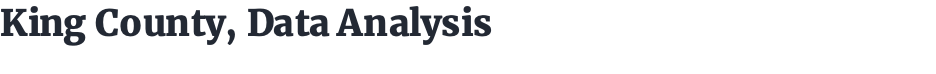

* Student name: Natalia Edelson
* Student pace: self paced / part time / full time: Flex Program 
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: https://medium.com/@nataliagoncharov/data-analysis-real-estate-in-king-county-washington-6c74cadc2e79



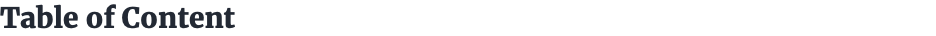

* [Data Description](#chapter1)
* [Project’s Purpose](#attachment:image-3.png)
* [Exploratory Data Analysis](#attachment:image-3.png](#chapter3)
    * [House Features](#section_3_1)
* [Preparing for Modeling](#attachment:image-3.png)
    * [Split the data](#subchapter)
    * [Categorical valuables](#subchapter)
    * [Check for Multicollinearity](#subchapter)
    * [Scale the data](#subchapter)
* [Model and Interpretation](#attachment:image-4.png)    
* [Conclusions](#attachment:image-5.png)

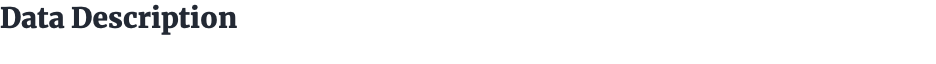 

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

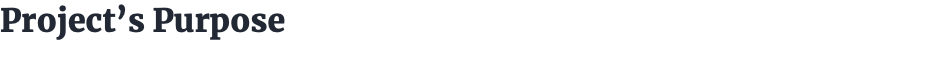

The purpose of this project is to advise Edegon and Company, a real estate investment firm in King County, Washington. The following Data and Analysis will help the firm predict the market value of a given house, while the conclusions offer recommendations for future investments.


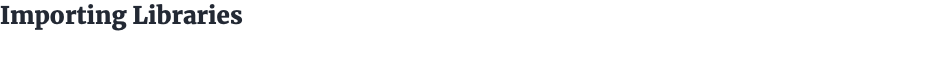

In [1]:
# Importing the neccessary libraries 
import pandas as pd 
# Import the neccessary libraries 
import pandas as pd 
import statsmodels as sm

from   statsmodels.api import formula 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

import seaborn_image as isns
isns.set_context(fontfamily="times") # Setting up global font type
# Uploading the data 
kc_data = pd.read_csv("kc_house_data.csv", parse_dates = ['date'])

# Looking that the data has been uploaded properly and have a first glance
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


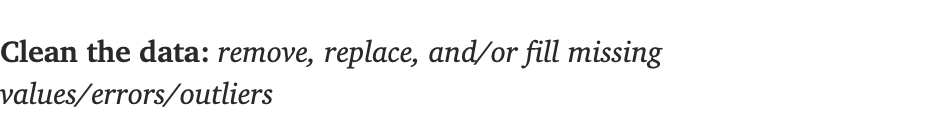

In [2]:
# Converting price unites to $ millions so that the data appears 
# cleaner in graphs later on. 

kc_data['price'] = kc_data['price']

In [3]:
# Checking the size of the data.

kc_data.shape

(21597, 21)

In [4]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
# Checking the columns that exist in the data.

columns = list(kc_data.columns)
print(columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [6]:
kc_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

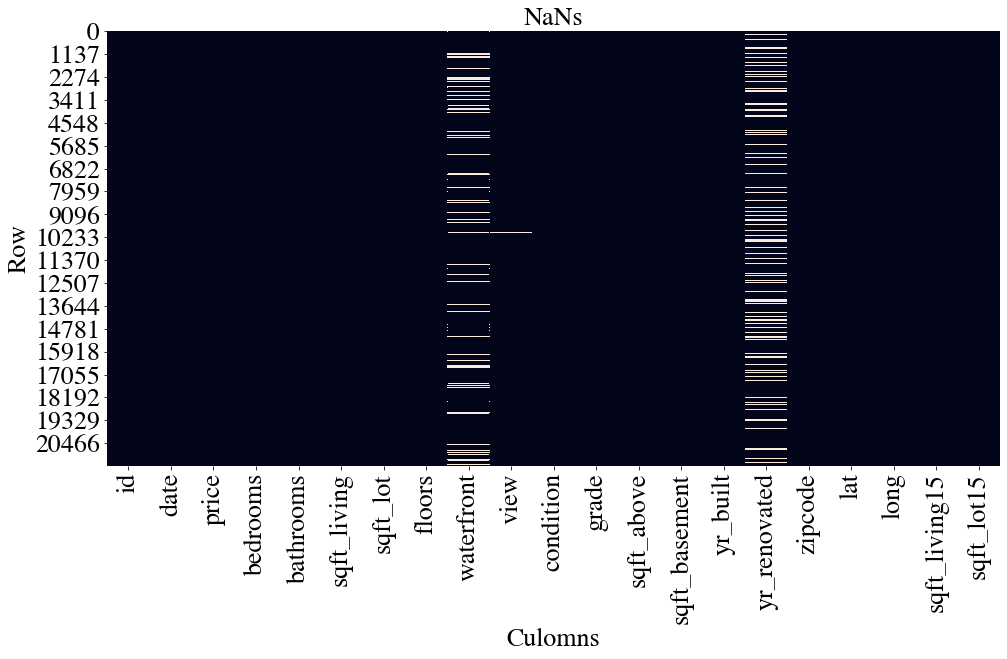

In [7]:
'''Visualizing the null values using heatmap. This allows me to see 
the big picture of the data more clearly.'''

fig, ax = plt.subplots(figsize=(16,8))

plt.tick_params(labelsize=22)

sns.heatmap(kc_data.isnull(), cbar=False)


plt.title("NaNs",fontsize=26)
plt.xlabel('Culomns',fontsize=26)
plt.ylabel('Row',fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=26)

plt.show()

#### Checking the percentage of null values to determined whether I can delete raws of the respective NaN values and not loose a significant amount of data.

In [8]:
percent_null = kc_data.isnull().sum() * 100 / len(kc_data)

missing_value_kc_data = pd.DataFrame({'column_name': kc_data.columns,
                                 'percent_missing': percent_null})

percent_null

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

#### View column has a small number of null values, therefore we can remove the rows in which the view column appears as NaN. 

In [9]:
# Let's drop all the rows in which there is NaNs in the view column. 
kc_data = kc_data.dropna(subset=['view'])

#### Year renovated and waterfront show a larger number of null values. I will replace the null with zero for the years renovated and then I will change it to the integer type of data. 

In [10]:
kc_data['yr_renovated'] = kc_data['yr_renovated'].fillna(0)

In [11]:
kc_data['yr_renovated'] = kc_data['yr_renovated'].astype(int)

In [12]:
kc_data['yr_renovated'].value_counts()

0       20791
2014       73
2003       31
2013       31
2007       30
        ...  
1946        1
1951        1
1948        1
1953        1
1976        1
Name: yr_renovated, Length: 70, dtype: int64

#### Examining waterfront, the percentage of the missing data is 11% and we will be left with 19,164 eateries. Therefore, I decided to clean it by removing the respective rows. There is a ‘?’ in the data. 

In [13]:
kc_data.dropna(subset=['waterfront'], inplace=True)

In [14]:
# We will run the is sum of null code again to see what's left.  
kc_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19164 non-null  int64         
 1   date           19164 non-null  datetime64[ns]
 2   price          19164 non-null  float64       
 3   bedrooms       19164 non-null  int64         
 4   bathrooms      19164 non-null  float64       
 5   sqft_living    19164 non-null  int64         
 6   sqft_lot       19164 non-null  int64         
 7   floors         19164 non-null  float64       
 8   waterfront     19164 non-null  object        
 9   view           19164 non-null  object        
 10  condition      19164 non-null  object        
 11  grade          19164 non-null  object        
 12  sqft_above     19164 non-null  int64         
 13  sqft_basement  19164 non-null  object        
 14  yr_built       19164 non-null  int64         
 15  yr_renovated   1916

#### The data type for sqft_basement is shown to be ‘object’ and is supposed to be an integer or float. Scanning the sqft basement values to understand what values appear as objects. 

In [16]:
# sqft_basement  21534 non-null  object should be a number 
kc_data['sqft_basement'].unique()

array(['400.0', '0.0', '910.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0',
       '550.0', '1000.0', '1600.0', '1700.0', '500.0', '1040.0', '880.0',
       '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0', '560.0',
       '840.0', '770.0', '570.0', '1490.0', '620.0', '1250.0', '1270.0',
       '120.0', '650.0', '180.0', '1130.0', '450.0', '1640.0', '1460.0',
       '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0', '1310.0',
       '630.0', '2000.0', '390.0', '430.0', '210.0', '1950.0', '440.0',
       '220.0', '1160.0', '860.0', '580.0', '2060.0', '1820.0', '1180.0',
       '380.0', '200.0', '1150.0', '1200.0', '680.0', '1450.0', '1170.0',
       '1080.0', '960.0', '280.0', '870.0', '1100.0', '1400.0', '530.0',
       '660.0', '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0',
       '690.0', '270.0', '350.0', '935.0', '710.0', '

#### I will replace it and 0 with a NaN and then drop the respective rows to remove it from the data. 

In [17]:
kc_data.sqft_basement.replace('?' and '0', np.nan ,inplace = True)

In [18]:
kc_data.sqft_basement.replace('0.0', np.nan, inplace = True)

In [19]:
kc_data.sqft_basement.replace('?', np.nan, inplace = True)

In [20]:
# Dropping NaNs from sqft_basement 
kc_data.dropna(subset=['sqft_basement'],inplace =True)

In [21]:
kc_data['sqft_basement'].unique()

array(['400.0', '910.0', '1530.0', '730.0', '300.0', '970.0', '760.0',
       '720.0', '700.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0', '550.0',
       '1000.0', '1600.0', '1700.0', '500.0', '1040.0', '880.0', '1010.0',
       '240.0', '265.0', '290.0', '800.0', '540.0', '560.0', '840.0',
       '770.0', '570.0', '1490.0', '620.0', '1250.0', '1270.0', '120.0',
       '650.0', '180.0', '1130.0', '450.0', '1640.0', '1460.0', '1020.0',
       '1030.0', '750.0', '640.0', '1070.0', '490.0', '1310.0', '630.0',
       '2000.0', '390.0', '430.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '860.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0',
       '200.0', '1150.0', '1200.0', '680.0', '1450.0', '1170.0', '1080.0',
       '960.0', '280.0', '870.0', '1100.0', '1400.0', '530.0', '660.0',
       '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0',
       '270.0', '350.0', '935.0', '710.0', '1370.0', '98

In [22]:
kc_data['sqft_basement'] = kc_data['sqft_basement'].str.split \
('.',n=1, expand = True)

In [23]:
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(int)

In [24]:
kc_data['grade']= kc_data['grade'].astype(str)

In [25]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7370 entries, 1 to 21591
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7370 non-null   int64         
 1   date           7370 non-null   datetime64[ns]
 2   price          7370 non-null   float64       
 3   bedrooms       7370 non-null   int64         
 4   bathrooms      7370 non-null   float64       
 5   sqft_living    7370 non-null   int64         
 6   sqft_lot       7370 non-null   int64         
 7   floors         7370 non-null   float64       
 8   waterfront     7370 non-null   object        
 9   view           7370 non-null   object        
 10  condition      7370 non-null   object        
 11  grade          7370 non-null   object        
 12  sqft_above     7370 non-null   int64         
 13  sqft_basement  7370 non-null   int64         
 14  yr_built       7370 non-null   int64         
 15  yr_renovated   7370 

In [26]:
kc_data.dropna(subset=['sqft_basement'], inplace = True)

In [27]:
# Double checking that the '?' was removed.

kc_data.sqft_basement.unique()

array([ 400,  910, 1530,  730,  300,  970,  760,  720,  700,  820,  780,
        790,  330, 1620,  360,  588, 1510,  410,  990,  600,  550, 1000,
       1600, 1700,  500, 1040,  880, 1010,  240,  265,  290,  800,  540,
        560,  840,  770,  570, 1490,  620, 1250, 1270,  120,  650,  180,
       1130,  450, 1640, 1460, 1020, 1030,  750,  640, 1070,  490, 1310,
        630, 2000,  390,  430,  210, 1950,  440,  220, 1160,  860,  580,
       2060, 1820, 1180,  380,  200, 1150, 1200,  680, 1450, 1170, 1080,
        960,  280,  870, 1100, 1400,  530,  660, 1220,  900,  420, 1580,
       1380,  475,  690,  270,  350,  935,  710, 1370,  980,  850, 1470,
        160,  950,  460,   50, 1900,  340,  470,  370,  140,  480, 1760,
        130,  520,  890, 1110,  150, 1720,  810,  190, 1290,  670, 1800,
       1120,   60, 1050,  940,  310,  930, 1390,  610, 1830, 1300,  510,
       1590,  920, 1320, 1420, 1240, 1960, 1560, 2020, 1190, 2110, 1280,
        250, 1230,  170, 1780,  830, 1330, 1410,  5

In [28]:
'''Creating two new columns, 'month' and 'year' by extracting them 
from the date column. This will help me detect any seasonality trends.'''

def extract_date(df,column):
    kc_data[column+"year"] = kc_data[column].apply(lambda x: x.year)
    kc_data[column+"_month"] = kc_data[column].apply(lambda x: x.month)

In [29]:
extract_date(kc_data,'date')

In [30]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4
11,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,5


In [31]:
# dropping 'data' column since we do not need it anymore 
kc_data.drop(['date'], axis=1, inplace=True)

In [32]:
# Using describe method to check for outliers.

kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
count,7.370000e+03,7.370000e+03,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000
mean,4.608717e+09,6.236722e+05,3.558480,2.272693,2313.011805,13188.630665,1.324830,1573.544912,739.466893,1965.094301,86.246269,98088.559973,47.583131,-122.255627,2021.529308,11394.298643,2014.317639,6.605834
std,2.870696e+09,4.497373e+05,1.014971,0.777863,959.555858,30776.711805,0.479015,726.383103,406.956997,28.407044,406.184637,55.644301,0.122733,0.119262,660.343167,23917.322717,0.465590,3.101004
min,2.800031e+06,1.000000e+05,1.000000,0.500000,680.000000,572.000000,1.000000,480.000000,10.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,460.000000,651.000000,2014.000000,1.000000
25%,2.145425e+09,3.750000e+05,3.000000,1.750000,1680.000000,5000.000000,1.000000,1117.000000,440.000000,1947.000000,0.000000,98034.000000,47.521125,-122.351000,1560.000000,5000.000000,2014.000000,4.000000
50%,3.971701e+09,5.130000e+05,3.000000,2.250000,2100.000000,7520.000000,1.000000,1370.000000,700.000000,1967.000000,0.000000,98105.000000,47.596250,-122.288000,1880.000000,7560.000000,2014.000000,6.000000
75%,7.338402e+09,7.110000e+05,4.000000,2.750000,2700.000000,10660.750000,2.000000,1780.000000,970.000000,1984.000000,0.000000,98124.250000,47.678900,-122.180000,2320.000000,10017.000000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,871200.000000,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6110.000000,871200.000000,2015.000000,12.000000


#### Continuing Scrubbing
* There are some categorical variables such as: waterfront, view, condition, grade, yr_built and zip code. I will handle these later on.
* The maximum square feet is 13,450 and the minimum is 680 which suggests widely distributed data.
* In the bedroom column the maximum number is 33 and this seems to be an outlier or perhaps even a place holder, so I will remove that data point below.
 


In [33]:
# kc_data['bedrooms'].idxmax()

In [34]:
# I will remove 33 in the bedrooms column given that it is an outlier 
# and I will use the idxmax() method. 

kc_data['bedrooms'] = kc_data['bedrooms'].drop(kc_data['bedrooms'].idxmax())
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
count,7.370000e+03,7.370000e+03,7369.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000
mean,4.608717e+09,6.236722e+05,3.554485,2.272693,2313.011805,13188.630665,1.324830,1573.544912,739.466893,1965.094301,86.246269,98088.559973,47.583131,-122.255627,2021.529308,11394.298643,2014.317639,6.605834
std,2.870696e+09,4.497373e+05,0.955325,0.777863,959.555858,30776.711805,0.479015,726.383103,406.956997,28.407044,406.184637,55.644301,0.122733,0.119262,660.343167,23917.322717,0.465590,3.101004
min,2.800031e+06,1.000000e+05,1.000000,0.500000,680.000000,572.000000,1.000000,480.000000,10.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,460.000000,651.000000,2014.000000,1.000000
25%,2.145425e+09,3.750000e+05,3.000000,1.750000,1680.000000,5000.000000,1.000000,1117.000000,440.000000,1947.000000,0.000000,98034.000000,47.521125,-122.351000,1560.000000,5000.000000,2014.000000,4.000000
50%,3.971701e+09,5.130000e+05,3.000000,2.250000,2100.000000,7520.000000,1.000000,1370.000000,700.000000,1967.000000,0.000000,98105.000000,47.596250,-122.288000,1880.000000,7560.000000,2014.000000,6.000000
75%,7.338402e+09,7.110000e+05,4.000000,2.750000,2700.000000,10660.750000,2.000000,1780.000000,970.000000,1984.000000,0.000000,98124.250000,47.678900,-122.180000,2320.000000,10017.000000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,871200.000000,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6110.000000,871200.000000,2015.000000,12.000000


In [35]:
# Confirming that there are no missing values. 

missing_value_kc_data 

,column_name,percent_missing
id,id,0.000000
date,date,0.000000
price,price,0.000000
bedrooms,bedrooms,0.000000
bathrooms,bathrooms,0.000000
sqft_living,sqft_living,0.000000
sqft_lot,sqft_lot,0.000000
floors,floors,0.000000
waterfront,waterfront,11.001528
view,view,0.291707


#### The data in both condition and view columns contain numbers and words in them. I will convert the data type to integer by replacing it with numbers, keeping the range of ranking.


In [36]:
kc_data['grade'].unique()

array(['7 Average', '11 Excellent', '9 Better', '8 Good', '5 Fair',
       '6 Low Average', '10 Very Good', '12 Luxury', '13 Mansion',
       '4 Low'], dtype=object)

In [37]:
kc_data['grade'] = kc_data['grade'].str.extract(r'(\d+)', expand = True) 
kc_data['grade'].unique()

array(['7', '11', '9', '8', '5', '6', '10', '12', '13', '4'], dtype=object)

In [38]:
kc_data['grade'] = kc_data['grade'].astype(int)

In [39]:
# Setting up encoding by assigning an integer value for each unique category 
dic_cond = {'Poor' : 1, 'Fair' : 2, 'Average': 3, 'Good' : 4, 'Very Good': 5}
dic_view = {'NONE':1,'FAIR':2, 'AVERAGE':3,'GOOD':4 , 'EXCELLENT':5}
#dic_waterfront ={'NO':0, 'YES':1}
kc_data['condition'] = kc_data['condition'].map(dic_cond)
kc_data['view'] = kc_data['view'].map(dic_view)
#kc_data['waterfront'] = kc_data['waterfront'].map(dic_waterfront)
kc_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,NO,1,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,NO,1,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
5,7237550310,1230000.0,4.0,4.50,5420,101930,1.0,NO,1,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5
8,2414600126,229500.0,3.0,1.00,1780,7470,1.0,NO,1,3,...,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4
11,9212900260,468000.0,2.0,1.00,1160,6000,1.0,NO,1,4,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,5


In [40]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7370 entries, 1 to 21591
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7370 non-null   int64  
 1   price          7370 non-null   float64
 2   bedrooms       7369 non-null   float64
 3   bathrooms      7370 non-null   float64
 4   sqft_living    7370 non-null   int64  
 5   sqft_lot       7370 non-null   int64  
 6   floors         7370 non-null   float64
 7   waterfront     7370 non-null   object 
 8   view           7370 non-null   int64  
 9   condition      7370 non-null   int64  
 10  grade          7370 non-null   int64  
 11  sqft_above     7370 non-null   int64  
 12  sqft_basement  7370 non-null   int64  
 13  yr_built       7370 non-null   int64  
 14  yr_renovated   7370 non-null   int64  
 15  zipcode        7370 non-null   int64  
 16  lat            7370 non-null   float64
 17  long           7370 non-null   float64
 18  sqft_li

In [41]:
kc_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,NO,1,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,NO,1,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
5,7237550310,1230000.0,4.0,4.50,5420,101930,1.0,NO,1,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5
8,2414600126,229500.0,3.0,1.00,1780,7470,1.0,NO,1,3,...,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4
11,9212900260,468000.0,2.0,1.00,1160,6000,1.0,NO,1,4,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,5


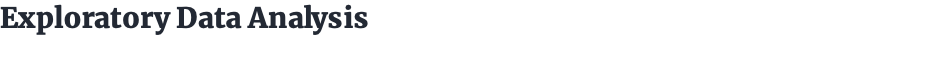

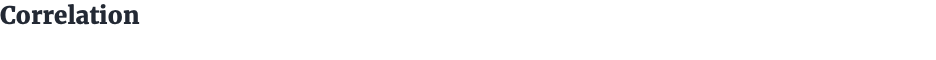

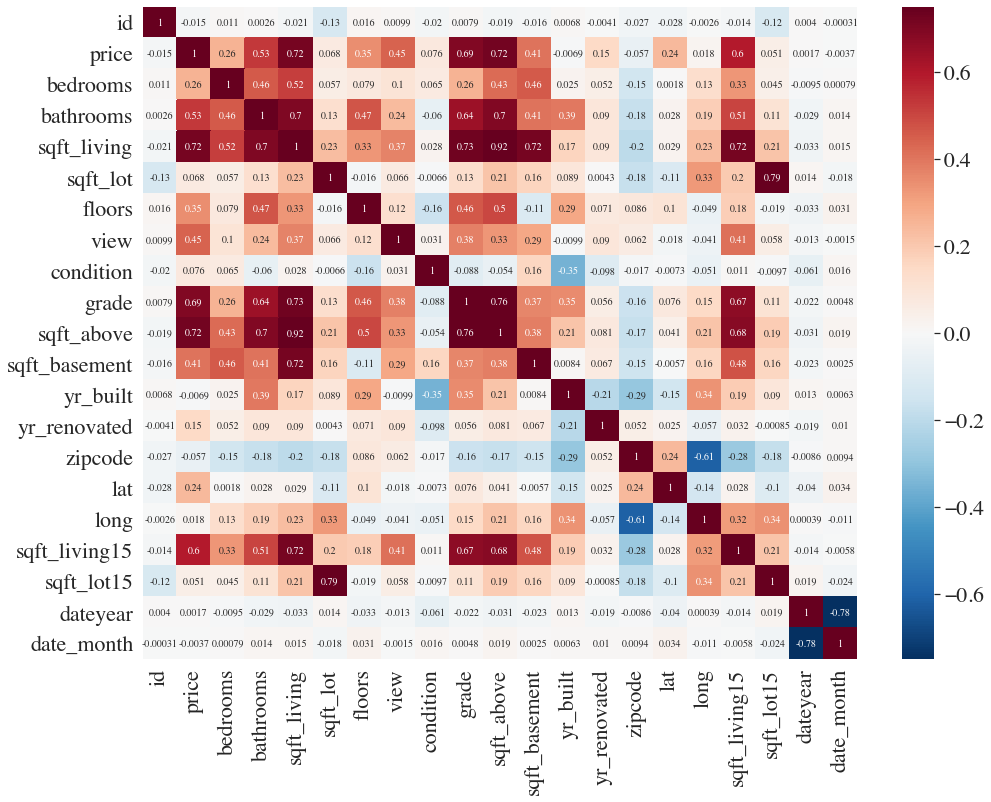

In [42]:
corr  = kc_data.corr()
plt.figure(figsize=(16, 12))
sns.set(font_scale=2)
isns.set_context(fontfamily="times")
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-0.75, 
                      vmax=0.75, cmap="RdBu_r")

In our data, I encountered 45 houses that were resold in 2014 and 2015. The majority of these were resold for a higher price. The grade or condition of the houses did not change, but the resale took place in a different time of the year. 

In [43]:
#  Creating a new database for the duplicate (resale) data
kc_data_dublicate = kc_data[kc_data.duplicated(subset=['id'],keep= False)]
kc_data_dublicate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
93,6021501535,430000.0,3.0,1.50,1580,5000,1.0,NO,1,3,...,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,7
94,6021501535,700000.0,3.0,1.50,1580,5000,1.0,NO,1,3,...,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,12
313,4139480200,1380000.0,4.0,3.25,4290,12103,1.0,NO,4,3,...,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,6
314,4139480200,1400000.0,4.0,3.25,4290,12103,1.0,NO,4,3,...,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,12
1084,9834200885,360000.0,4.0,2.50,2080,4080,1.0,NO,1,5,...,1040,1962,0,98144,47.5720,-122.290,1340,4080,2014,7


In [44]:
# Extracting only the necessary columns 
kc_data_dublicate = kc_data_dublicate[['id', 'date_month', 'price',
                                       'grade','condition']]
kc_data_dublicate

,id,date_month,price,grade,condition
93,6021501535,7,430000.0,8,3
94,6021501535,12,700000.0,8,3
313,4139480200,6,1380000.0,11,3
314,4139480200,12,1400000.0,11,3
1084,9834200885,7,360000.0,7,5
...,...,...,...,...,...
18689,3558900590,3,692500.0,7,3
18976,7856400300,7,1410000.0,10,5
18977,7856400300,3,1510000.0,10,5
19536,643300040,11,481000.0,7,4


In [45]:
'''Creating a new data frame in which I only include the duplicate data. 
Consolidating it using  group by ‘id’ where one raw represents one house 
that was sold and then re-sold at a later point.'''

kc_group_id = kc_data_dublicate.set_index(['id', kc_data_dublicate.groupby('id')
.cumcount()])[['price','date_month','grade','condition']].unstack().add_prefix('price').reset_index()

In [46]:
kc_group_id.head()

id priceprice           pricedate_month        pricegrade         \
                  price0    price1          price0 price1     price0 price1   
0   526059224   260000.0  470000.0               9      2          7      7   
1   641900050   335000.0  499950.0               8      2          7      7   
2   643300040   481000.0  719521.0              11      3          7      7   
3  1139600270   300000.0  310000.0               7      3          8      8   
4  1217000340   185000.0  340000.0               6      2          7      7   

  pricecondition         
          price0 price1  
0              3      3  
1              3      3  
2              4      4  
3              3      3  
4              4      4

In [47]:
kc_group_id.columns

MultiIndex([(             'id',       ''),
            (     'priceprice', 'price0'),
            (     'priceprice', 'price1'),
            ('pricedate_month', 'price0'),
            ('pricedate_month', 'price1'),
            (     'pricegrade', 'price0'),
            (     'pricegrade', 'price1'),
            ( 'pricecondition', 'price0'),
            ( 'pricecondition', 'price1')],
           )

In [48]:
# It turns into ta multi-inex dataframe - 
# I will remove the layer by using droplevel()
kc_group_id.columns = kc_group_id.columns.droplevel(level=0)

In [49]:
# Generating a list of numerizing the houses.
myList = list(range(1, 46))

In [50]:
kc_group_id['home_no.'] = myList 
kc_group_id.head()

,,price0,price1,price0,price1,price0,price1,price0,price1,home_no.
0,526059224,260000.0,470000.0,9,2,7,7,3,3,1
1,641900050,335000.0,499950.0,8,2,7,7,3,3,2
2,643300040,481000.0,719521.0,11,3,7,7,4,4,3
3,1139600270,300000.0,310000.0,7,3,8,8,3,3,4
4,1217000340,185000.0,340000.0,6,2,7,7,4,4,5


In [51]:
# Changing column names to clarify.

kc_group_id.columns.values[0] = 'id'
kc_group_id.columns.values[1] = 'price_1'
kc_group_id.columns.values[2] = 'price_2'
kc_group_id.columns.values[3] = 'month_1'
kc_group_id.columns.values[4] = 'month_2'
kc_group_id.columns.values[5] = 'grade_1'
kc_group_id.columns.values[6] = 'grade_2'
kc_group_id.columns.values[5] = 'cond_1'
kc_group_id.columns.values[6] = 'cond_2'

In [52]:
# Creating a new data frame where hume_no. is the index. 
buy_sell = pd.DataFrame(kc_group_id['home_no.'].index)

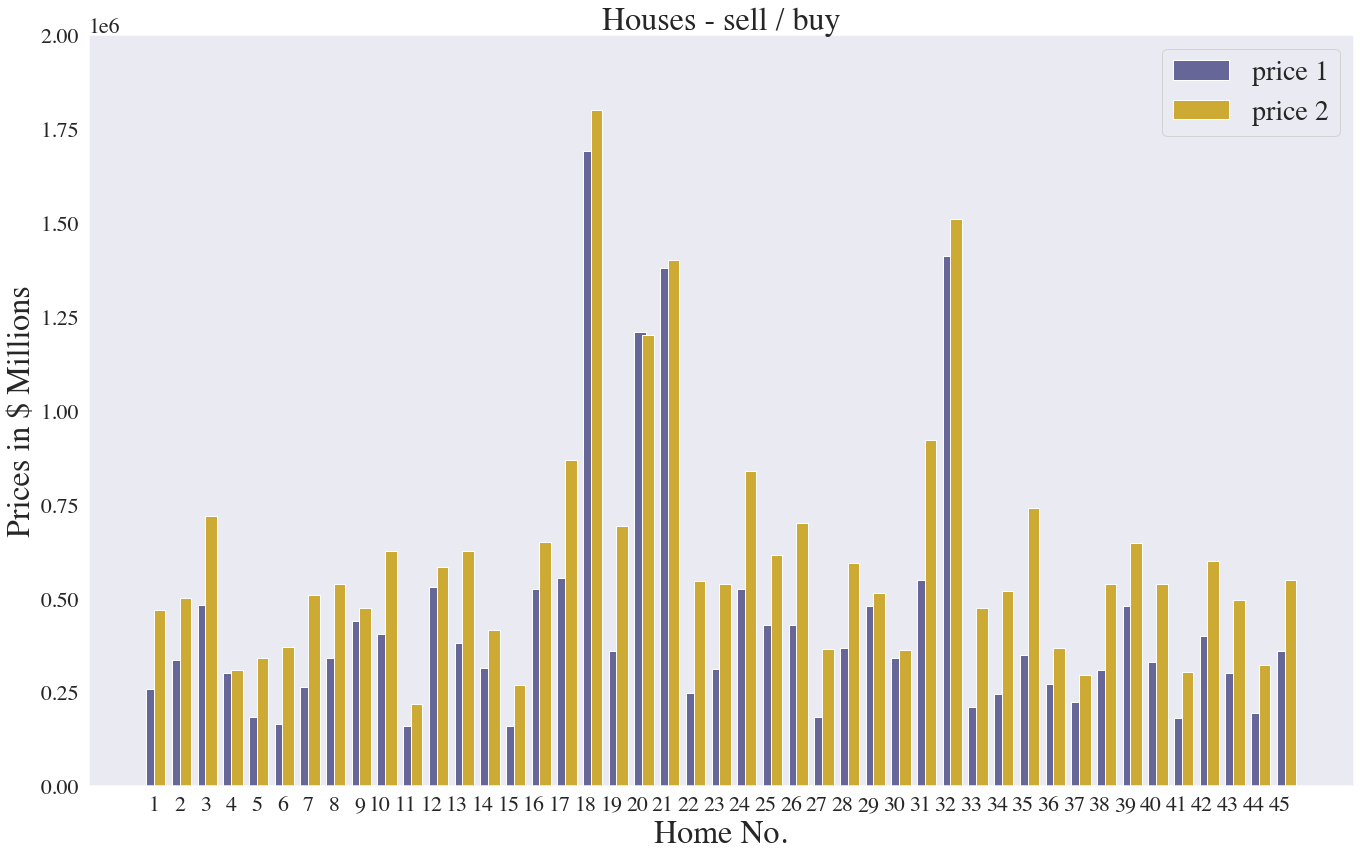

In [53]:
marks = buy_sell # setting x-ticks

x = np.arange(len(marks))  # the label locations

# set the plot, format, and labels


fig, ax = plt.subplots(figsize=(19,12))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2,
             kc_group_id['price_1'].values,
             width = 0.45,
             color = '#666699',
             label='price 1')
ax2 = ax.bar(x + bar_width / 2,
             kc_group_id['price_2'].values,
             width = 0.45,
             color = '#CCAA33',
             label='price 2')
#ax.yaxis.set_major_formatter(currency) #CCAA33
plt.ylim(0,2000000)

plt.tick_params(labelsize=22)

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(kc_group_id['home_no.'].unique())


plt.setp(ax.get_xticklabels(), rotation=0, ha='right') 
# cite: https://pythonguides.com/matplotlib-x-axis-label/


ax.grid(color='#AF3150', linestyle='-', linewidth=0.1)
ax.set_xlabel('Home No.',fontsize = 32)
ax.set_ylabel('Prices in $ Millions', fontsize = 32)
# Add title and legends 

ax.set_title('Houses - sell / buy', fontsize = 32)
ax.legend(loc="upper right", frameon=True, fontsize=28)
# format the layout and display the visualization
fig.tight_layout()
plt.show()

In [54]:
# Creating a column that captures the difference of the price 
# differences(gross profit).

kc_group_id['price_diff'] = kc_group_id['price_2'] - kc_group_id['price_1']

In [55]:
# Looking tinto the new dataset
kc_group_id.head()

,id,price_1,price_2,month_1,month_2,cond_1,cond_2,price0,price1,home_no.,price_diff
0,526059224,260000.0,470000.0,9,2,7,7,3,3,1,210000.0
1,641900050,335000.0,499950.0,8,2,7,7,3,3,2,164950.0
2,643300040,481000.0,719521.0,11,3,7,7,4,4,3,238521.0
3,1139600270,300000.0,310000.0,7,3,8,8,3,3,4,10000.0
4,1217000340,185000.0,340000.0,6,2,7,7,4,4,5,155000.0


In [56]:
# Creating a new data set using groupby of the month when 
# the home was sold 
group_month = kc_group_id.groupby(['month_2']).mean()
group_month = pd.DataFrame.reset_index(group_month)

group_month.head()

,month_2,id,price_1,price_2,month_1,cond_1,cond_2,price0,price1,home_no.,price_diff
0,1,5.286512e+09,361483.000000,553625.000000,6.250000,7.000000,7.000000,3.500000,3.500000,25.000000,192142.000000
1,2,4.510416e+09,299475.363636,483804.545455,8.181818,7.272727,7.272727,3.272727,3.272727,20.909091,184329.181818
2,3,4.853603e+09,494596.666667,684534.733333,7.866667,7.400000,7.400000,3.333333,3.333333,21.466667,189938.066667
3,4,6.686515e+09,391100.000000,531714.285714,9.285714,7.428571,7.428571,3.285714,3.285714,31.285714,140614.285714
4,5,2.766601e+09,255500.000000,528470.000000,9.000000,6.500000,6.500000,3.000000,3.000000,14.500000,272970.000000


In [57]:
# Creating a function that has bars with range of colores - darker from 
# tightest and lighter to the lowset.
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

s = group_month ["price_diff"]
#s2 = total_group_month ["price"]

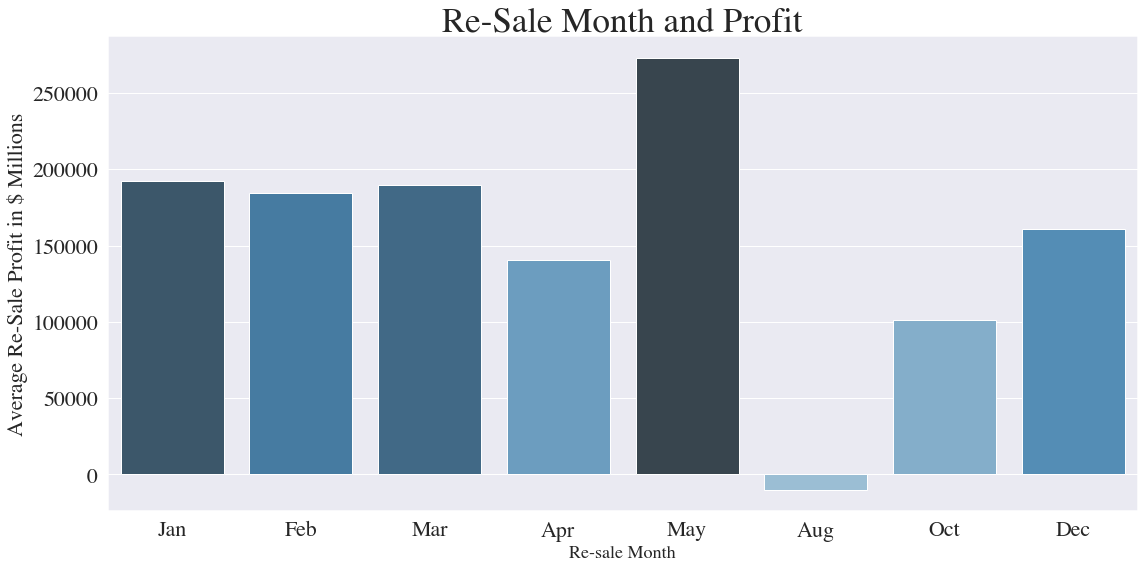

In [58]:
# Plot bar displaying the months of the release day and 
#making the darkest color to be the highest.

fig, ax = plt.subplots(figsize=(16, 8))

# Create plot here with sns.

sns.barplot(x="month_2", y="price_diff", data=group_month, 
            palette=colors_from_values(s, "Blues_d"))

# Lable and define fontsize for main and axis titles.

plt.xlabel('Re-sale Month', fontsize=18)
plt.ylabel('Average Re-Sale Profit in $ Millions', fontsize=22)
plt.title('Re-Sale Month and Profit', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=22)

# Set x-axis tick labels.

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Aug','Oct','Dec'])


plt.tight_layout()
plt.show()

The resale price was highest during the month of May, followed by January and March. In the summer, there were no resales, and those that did take place (August) lost money. This suggests that the timing of the sale makes a difference. 

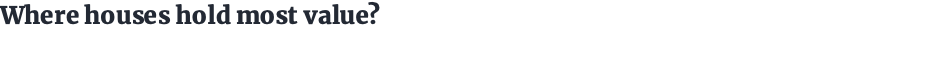

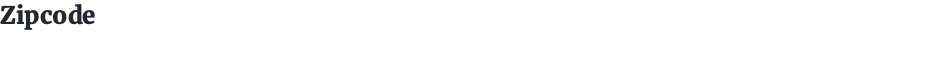

In [59]:
''' will group the zipcodes by price and check their mean 
so that I could see if there is any pattern of the prices ''' 
group_zipcode = kc_data.groupby(['zipcode'])['price'].mean()

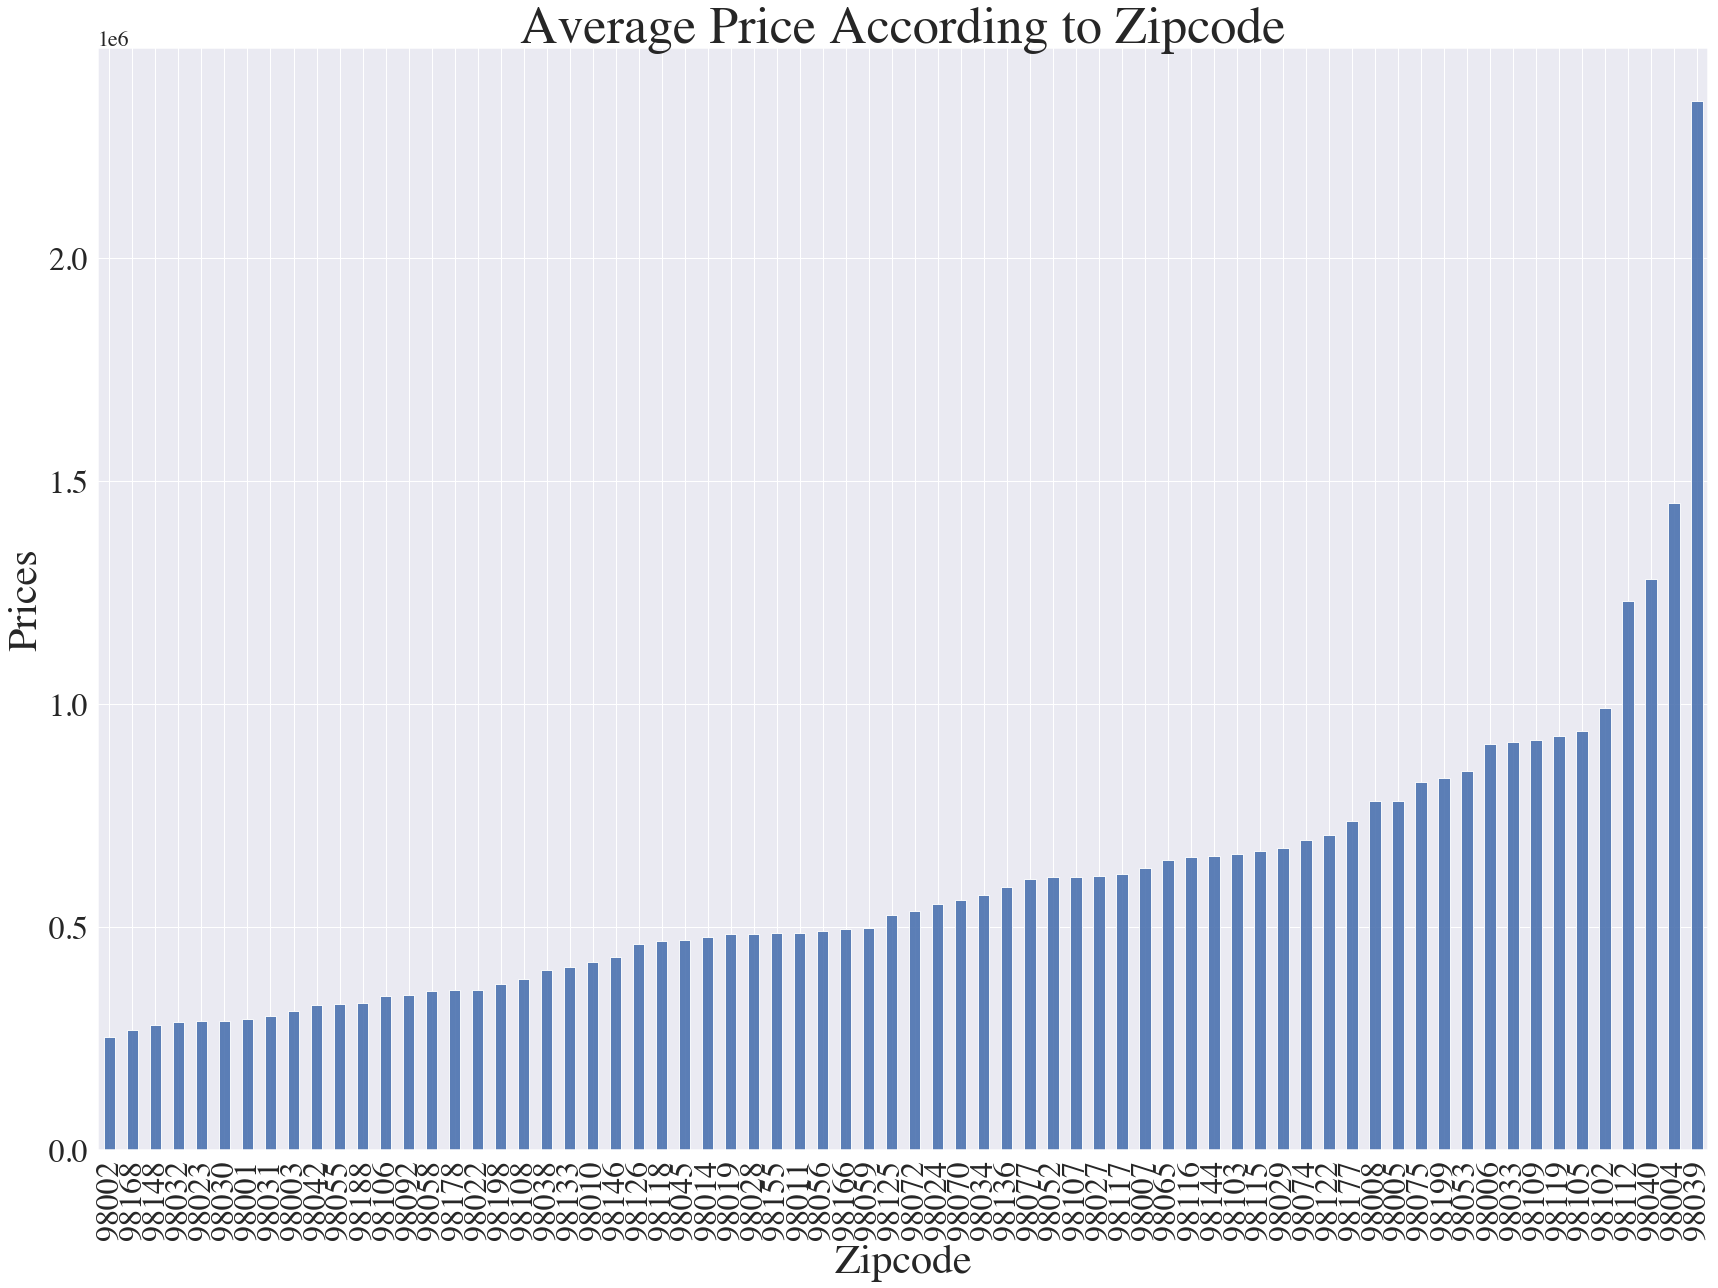

<Figure size 432x288 with 0 Axes>

In [60]:
# Let's view the data with a sorted value

plt.figure(figsize=(8, 8))
isns.set_context(fontfamily="times")
group_zipcode = group_zipcode.sort_values()
group_zipcode.plot(kind='bar',x='zipcode',y='price',align='center', 
                   alpha=0.9,figsize=(24,18))
# the plot gets saved to 'output.png'

plt.title('Average Price According to Zipcode', fontsize=52)
plt.xticks(rotation = 90,fontsize=32)
plt.yticks(rotation = 0,fontsize=32)
plt.xlabel('Zipcode',fontsize=42)
plt.ylabel('Prices',fontsize=42)
plt.tight_layout()

plt.show()
plt.savefig('output.png')

In [61]:
# Creating a new dataset for the top 5% zipcodes 
top5p = kc_data.sort_values(by= 'zipcode', ascending = False).head(368)
top5p.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
3153,6821100195,830000.0,4.0,3.00,2020,6000,1.0,NO,1,3,...,800,1968,2015,98199,47.6563,-122.401,1400,6000,2015,3
8678,6822100750,700000.0,3.0,1.75,1500,6000,1.0,NO,1,5,...,650,1940,0,98199,47.6474,-122.402,1700,6000,2015,5
19452,3271800870,1230000.0,4.0,2.25,2020,5800,1.0,NO,4,4,...,260,1941,0,98199,47.6471,-122.412,3100,5800,2014,8
3110,5035300750,850000.0,3.0,1.75,2450,8603,1.0,NO,1,5,...,1110,1940,0,98199,47.6536,-122.414,2280,5779,2014,7
3119,3271800850,765000.0,3.0,1.75,2440,5800,1.0,NO,4,4,...,1120,1945,0,98199,47.6474,-122.412,2530,5800,2014,8


In [62]:
# Creating a new dataset for the top 20% zipcodes 
top20p = kc_data.sort_values(by= 'price', ascending = False).head(1474)
top20p.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
7245,6762700020,7700000.0,6.0,8.00,12050,27600,2.5,NO,4,4,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10
3910,9808700762,7060000.0,5.0,4.50,10040,37325,2.0,YES,3,3,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014,6
9245,9208900037,6890000.0,6.0,7.75,9890,31374,2.0,NO,5,3,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014,9
4407,2470100110,5570000.0,5.0,5.75,9200,35069,2.0,NO,1,3,...,3000,2001,0,98039,47.6289,-122.233,3560,24345,2014,8
1446,8907500070,5350000.0,5.0,5.00,8000,23985,2.0,NO,5,3,...,1280,2009,0,98004,47.6232,-122.220,4600,21750,2015,4


#### Looking into any 20 % of the most expensive houses with their respective latitude, longitude. Houses seem to be scattered around with high prices being less frequent while the majority of the houses are below $2 million.

In [63]:
# Creating a new dataset for the top 20% and mapping out latitude and longitude 
top20p_long_lat = top20p[['lat', 'long']]
top20p_long_lat

,lat,long
7245,47.6298,-122.323
3910,47.6500,-122.214
9245,47.6305,-122.240
4407,47.6289,-122.233
1446,47.6232,-122.220
...,...,...
13392,47.6853,-122.305
16371,47.6296,-122.205
3145,47.7027,-122.282
19693,47.6214,-122.062


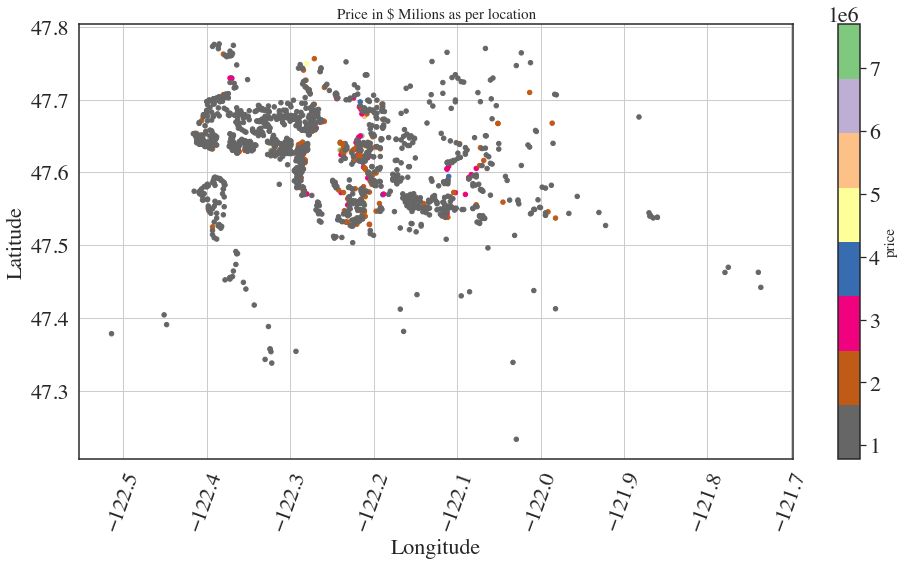

In [64]:
plt.style.use("seaborn-ticks")
isns.set_context(fontfamily="times")
top20p.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", 
             cmap="Accent_r", colorbar=True, sharex=False)


plt.xticks(rotation = 70)
plt.grid(which='both')
plt.title('Price in $ Milions as per location')

plt.xlabel('Longitude', fontsize=22)
plt.ylabel('Latitude', fontsize=22)
plt.savefig('output.png')
plt.show()

In [65]:
# I will group the zipcodes and check their mean so that 
# I could see if there is any pattern of the prices 
group_zipcode = top20p.groupby(['zipcode'])['price'].mean()
group_zipcode.head()

zipcode
98001    8.500000e+05
98003    8.100000e+05
98004    1.606250e+06
98005    9.391482e+05
98006    1.216673e+06
Name: price, dtype: float64

#### Extracting top and bottom 20 % of the most expensive houses with their respective latitude, longitude, and zip codes.

In [66]:
zipcode = top20p.groupby('zipcode', as_index = False)  
zipcode

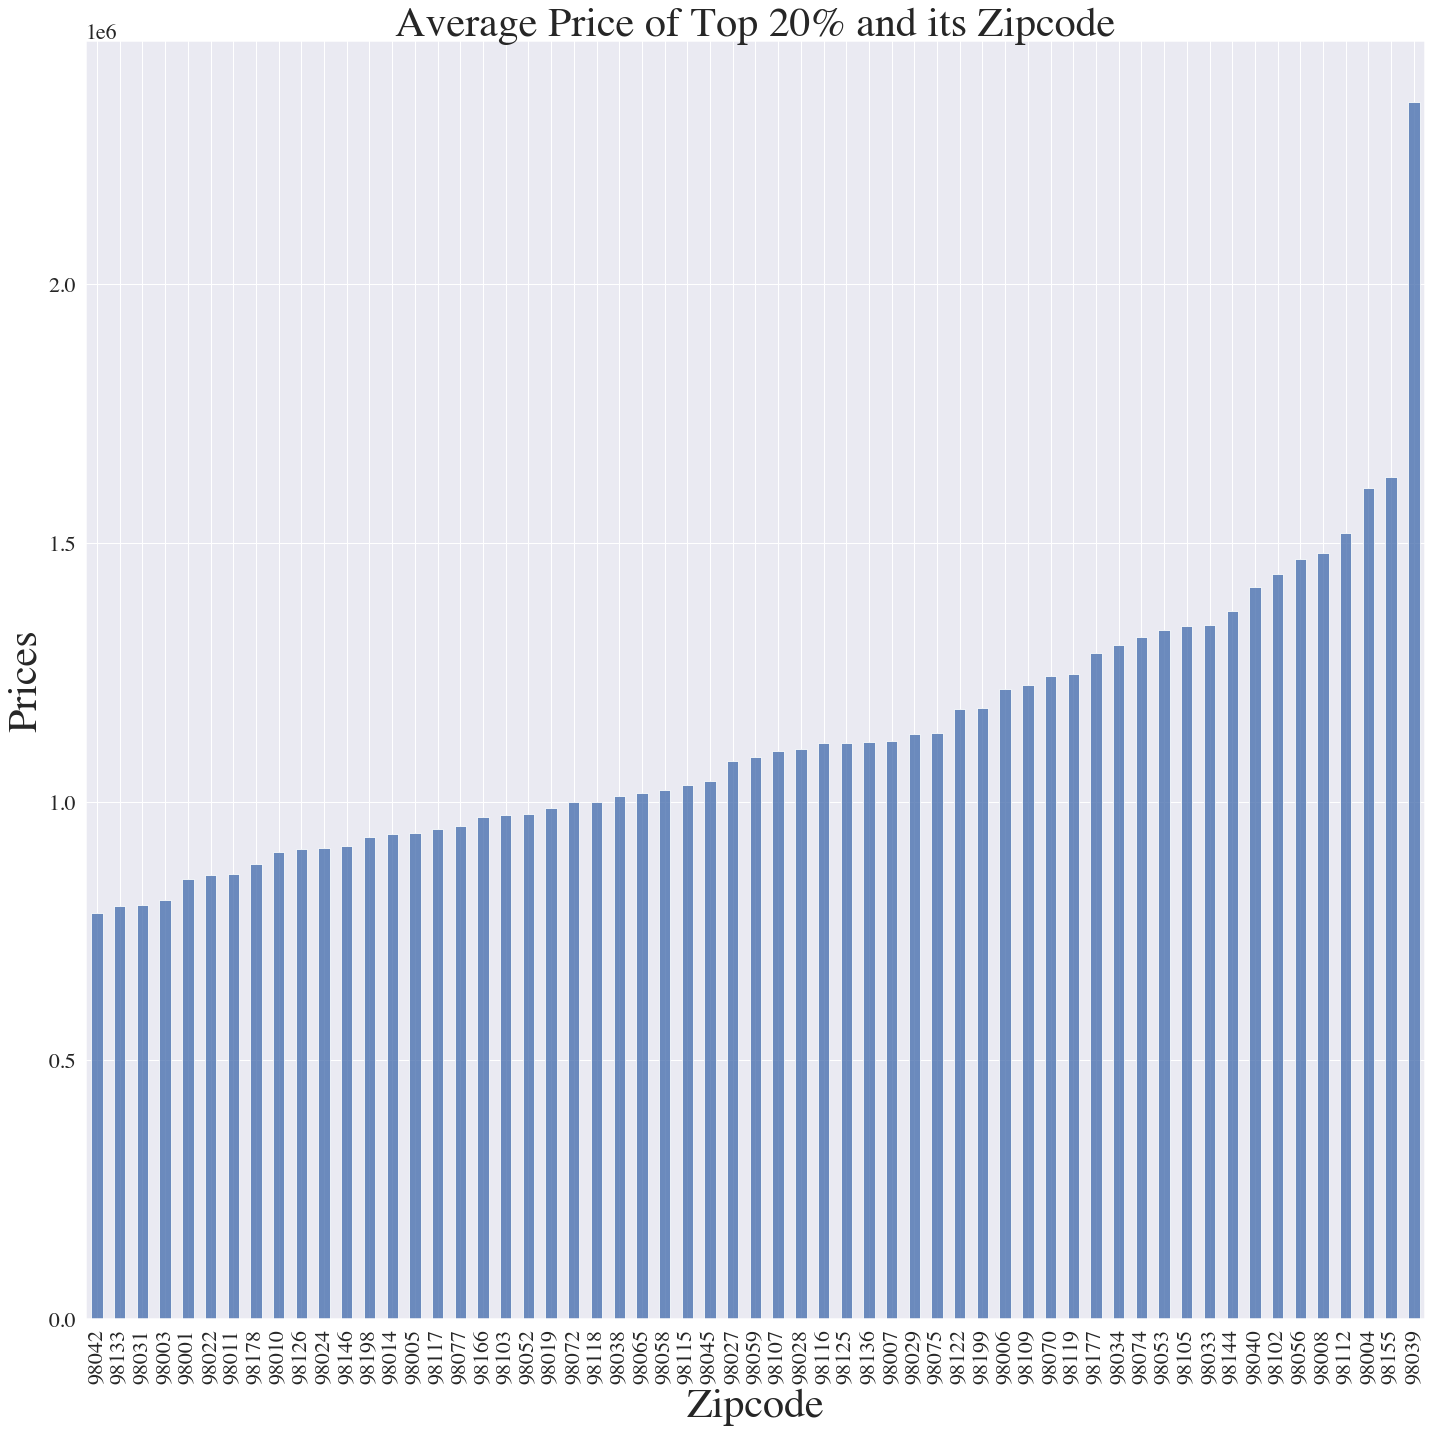

<Figure size 432x288 with 0 Axes>

In [67]:
# Let's view the data with a sorted value
plt.figure(figsize=(12, 8))
sns.set(font_scale=2)
isns.set_context(fontfamily="times")

group_zipcode = group_zipcode.sort_values()
group_zipcode.plot(kind='bar',x='zipcode',y='price',align='center', 
                   alpha=0.8,figsize=(20,20))
# the plot gets saved to 'output.png'

plt.title('Average Price of Top 20% and its Zipcode',fontsize=42 )

plt.xticks(rotation = 90)
plt.xlabel('Zipcode', fontsize=42)
plt.ylabel('Prices', fontsize=42)
plt.tight_layout()

plt.show()
plt.savefig('output.png')

In [68]:
# Creating a new dataset for the bottom 20% 
bottom20p = kc_data.sort_values(by= 'price', ascending = False).tail(368)
bottom20p

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
9430,4302201085,248000.0,3.0,1.00,1470,7680,1.0,NO,1,3,...,250,1946,0,98106,47.5276,-122.359,1470,6784,2014,9
1619,1310500550,248000.0,4.0,2.25,2320,8760,1.0,NO,1,4,...,1160,1966,0,98032,47.3627,-122.285,1970,8690,2014,12
8412,2172000846,248000.0,4.0,2.00,2080,13510,1.0,NO,1,3,...,1040,1950,0,98178,47.4918,-122.258,2010,11625,2014,6
4834,5151600480,248000.0,3.0,1.75,1840,19501,1.0,NO,1,4,...,570,1972,0,98003,47.3364,-122.318,1910,12000,2015,4
4295,2122059160,248000.0,5.0,1.75,2190,16788,1.0,NO,3,3,...,810,1978,0,98030,47.3764,-122.176,1920,8366,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12729,5560000650,135000.0,3.0,1.00,1520,8450,1.0,NO,1,2,...,400,1961,0,98023,47.3280,-122.337,1320,8450,2014,12
10376,3361402041,134000.0,3.0,1.00,1270,8508,1.0,NO,1,4,...,620,1942,0,98168,47.4961,-122.322,1200,9415,2014,10
3686,6303401050,132500.0,3.0,0.75,850,8573,1.0,NO,1,3,...,250,1945,0,98146,47.5030,-122.356,850,8382,2015,2
3481,3352402250,119900.0,2.0,1.00,700,3180,1.0,NO,1,3,...,220,1951,0,98178,47.4976,-122.262,1760,6360,2014,10


In [69]:
# Grouping the bottom 20 % by zipcode
group_zipcode_b = bottom20p.groupby(['zipcode'])['price'].mean()
group_zipcode_b.head()

zipcode
98001    213632.521739
98002    218162.500000
98003    223143.518519
98006    247500.000000
98010    200000.000000
Name: price, dtype: float64

In [70]:
# Grouping the bottom 20 % by zipcode
zipcode_b = bottom20p.groupby('zipcode', as_index = False)  
zipcode_b.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
9430,4302201085,248000.0,3.0,1.00,1470,7680,1.0,NO,1,3,...,250,1946,0,98106,47.5276,-122.359,1470,6784,2014,9
1619,1310500550,248000.0,4.0,2.25,2320,8760,1.0,NO,1,4,...,1160,1966,0,98032,47.3627,-122.285,1970,8690,2014,12
8412,2172000846,248000.0,4.0,2.00,2080,13510,1.0,NO,1,3,...,1040,1950,0,98178,47.4918,-122.258,2010,11625,2014,6
4834,5151600480,248000.0,3.0,1.75,1840,19501,1.0,NO,1,4,...,570,1972,0,98003,47.3364,-122.318,1910,12000,2015,4
4295,2122059160,248000.0,5.0,1.75,2190,16788,1.0,NO,3,3,...,810,1978,0,98030,47.3764,-122.176,1920,8366,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,7229700105,172500.0,2.0,2.00,1510,20685,1.0,NO,1,2,...,260,1958,0,98059,47.4810,-122.116,1490,29527,2015,4
19547,42000245,171000.0,4.0,2.00,1520,19672,1.0,NO,1,3,...,500,1920,0,98188,47.4683,-122.281,1810,7840,2014,6
9865,1219000473,164950.0,3.0,1.75,1570,15330,1.0,NO,1,3,...,490,1956,0,98166,47.4608,-122.340,1250,13330,2014,6
8716,7883603425,155000.0,3.0,1.00,1250,6250,1.0,NO,1,2,...,220,1949,0,98108,47.5292,-122.323,1130,6250,2014,5


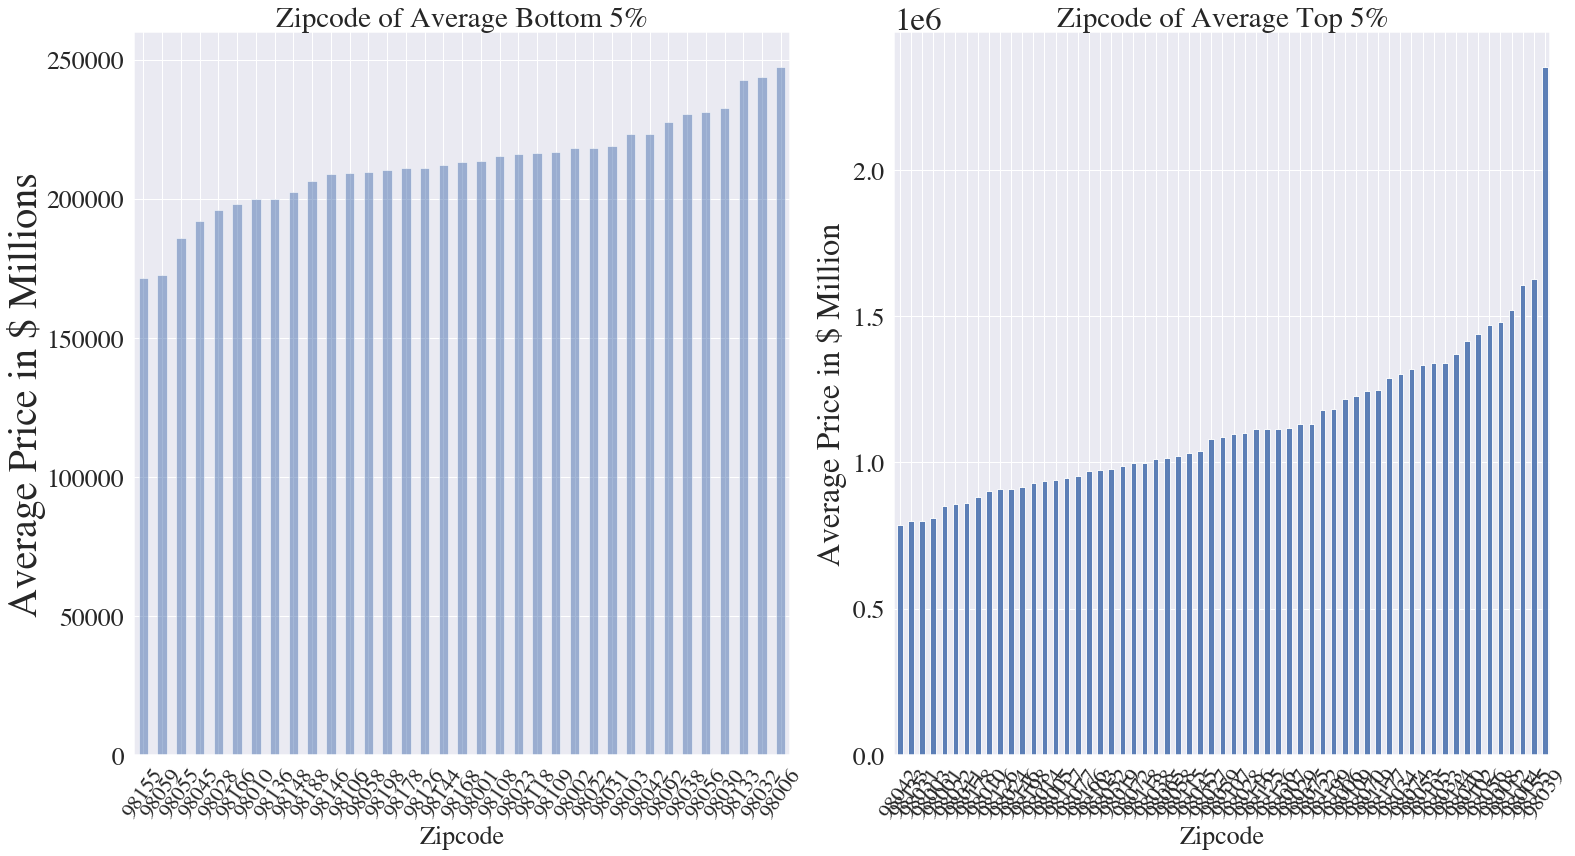

In [71]:
# Comparing the data of the two top and bottom 20%

sns.set(font_scale=3)
plt.figure(2, figsize=(8,8))

#plt.figure(figsize=(18, 12))
isns.set_context(fontfamily="times")
plt.subplot(1,2,1) # two subplots 
#sns.histplot(data=waterfront_non, kde=True)
group_zipcode_b = group_zipcode_b.sort_values()
group_zipcode_b.plot(kind='bar',x='zipcode',y='price', 
                     alpha=0.5,figsize=(22,12))
# the plot gets saved to 'output.png'

#sns.set(font="Garamond")
#plt.axvline(np.median(waterfront_non),color='b', linestyle='--')

#m = np.mean(waterfront_non)
#m = round(m,2)

plt.title('Zipcode of Average Bottom 5%', fontsize=29)
plt.xticks(rotation =55, fontsize=22)
plt.yticks(rotation =0, fontsize=26)
plt.xlabel('Zipcode',fontsize=26)
plt.ylabel('Average Price in $ Millions',labelpad=0.3, fontsize=40)


plt.subplot(1,2,2)
group_zipcode = group_zipcode.sort_values()
group_zipcode.plot(kind='bar',x='zipcode',y='price', 
                   alpha=0.9,figsize=(22,12))

plt.title('Zipcode of Average Top 5%',fontsize=29);
plt.xticks(rotation =55, fontsize=22)
plt.yticks(rotation =0, fontsize=26)
plt.xlabel('Zipcode',fontsize=26)
plt.ylabel('Average Price in $ Million',labelpad=5,fontsize=32)

plt.tight_layout()

plt.show()


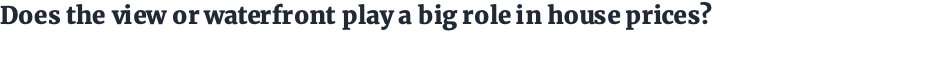

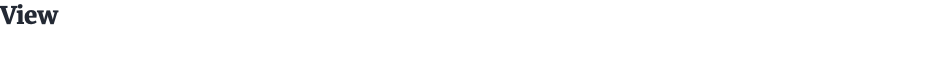

Looking into the price distribution in respect to the ranking of view using a box plot. 
 
The majority of houses are shown to have a low grade view. 
 
Only 7% of houses have what is considered a “good” or “excellent” view, and these range from 800K dollars to 2 million dollars in value. By comparison, 83% of houses do not have a view, and these range from 350K-500K dollars in value.


Text(0, 0.5, 'View')

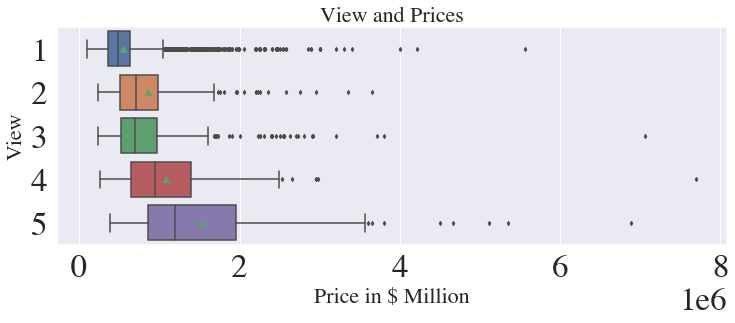

In [72]:
fig, ax = plt.subplots(figsize=(12,4))
isns.set_context(fontfamily="times")
sns.boxplot(y = kc_data['view'], x = kc_data['price'], 
            width = 0.8,orient = 'h', showmeans = True, 
            fliersize = 3, ax = ax)
plt.title('View and Prices', fontsize=22)
plt.xlabel('Price in $ Million',fontsize=22)
plt.ylabel('View',fontsize=22)

In [73]:
kc_data['view'].value_counts()

1    6147
3     501
4     305
2     212
5     205
Name: view, dtype: int64

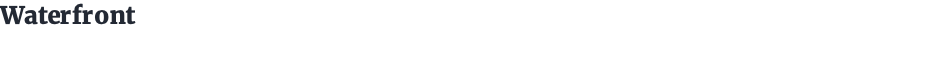

Examining the distribution of waterfront using a box plot.
 
Zeroing into the distribution of the houses with waterfront and houses without waterfront. 
 
In particular, waterfront homes are significantly more valuable than those without. Homes without a waterfront typically range from 300K-600K dollars, while waterfront homes typically cost more than three times that amount, from 900K-2.6M dollars.


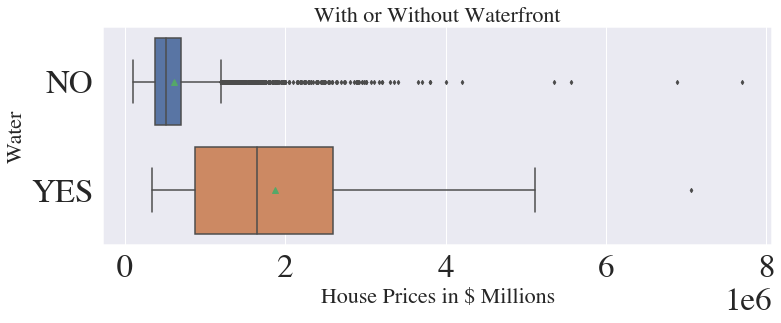

In [74]:
# We would need to visualize the data to clearly see where the data rests. 
# Let's use boxplot to visualize waterfront:

from scipy import stats, linalg

fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(y = kc_data['waterfront'], x = kc_data['price'], 
            width = 0.8,orient = 'h', showmeans = True, 
            fliersize = 3, ax = ax)
plt.title('With or Without Waterfront', fontsize=22)
plt.xlabel('House Prices in $ Millions',fontsize=22)
plt.ylabel('Water',fontsize=22)



# Calculate the correlation coefficient
#r, p = stats.pointbiserialr(kc_data['waterfront'], kc_data['price'])
#print ('point biserial correlation r is %s with p = %s' %(r,p))

plt.show()

Text(0, 0.5, 'Price in $ Millions')

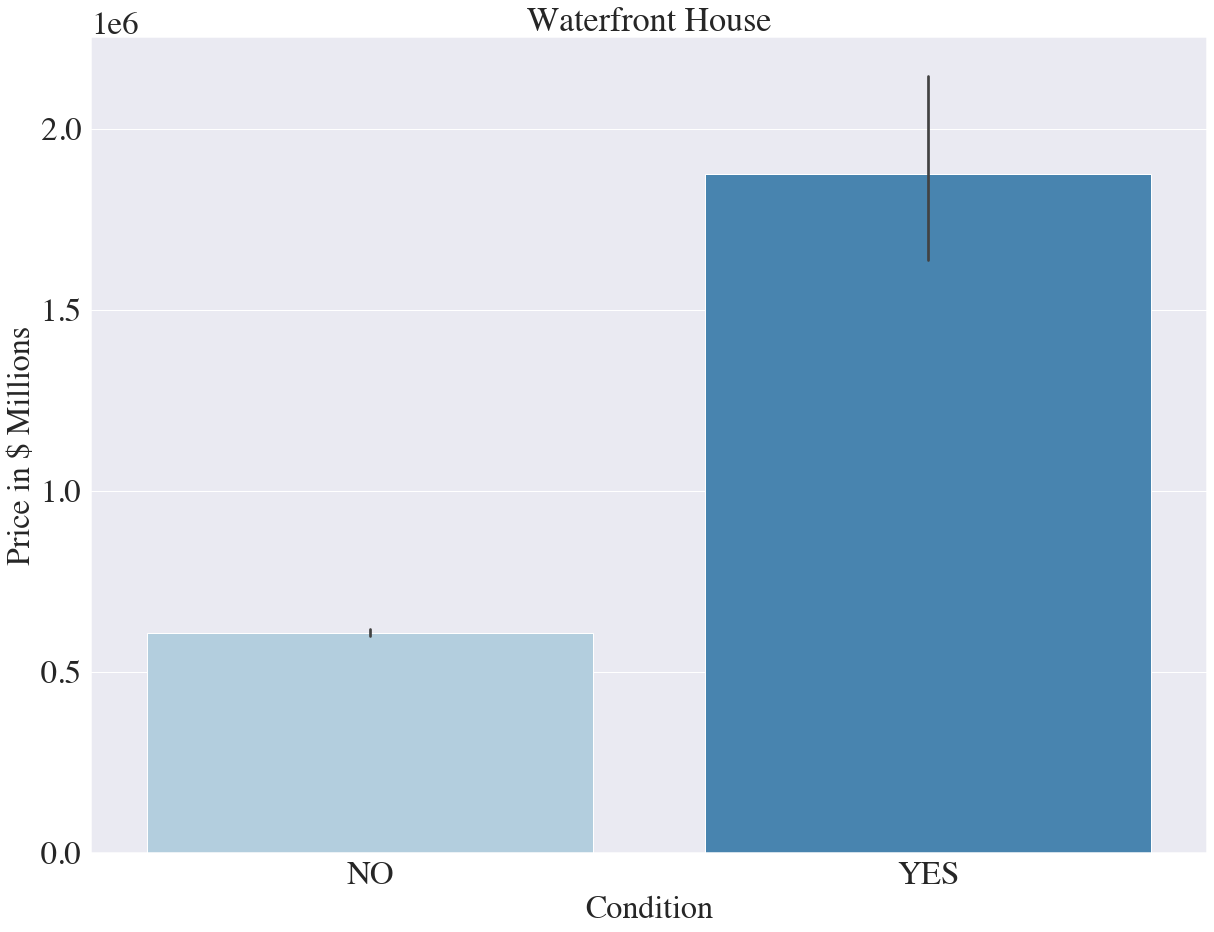

In [75]:
# Plotting a bar chart to see the comparison in a a simpler 
# way to add to presentation 
sns.set(font_scale=3)
isns.set_context(fontfamily="times")
plt.figure(1, figsize=(20,15))


sns.barplot(x='waterfront', y='price', data=kc_data,  palette='Blues')
plt.title('Waterfront House' , fontsize=34)
plt.xlabel('Condition', fontsize=32)
plt.ylabel('Price in $ Millions', fontsize=32)

In [76]:


# Dividing the data into water front and not water front to check the 
# distribution for each. 
waterfront_non = kc_data.loc[kc_data['waterfront']=='NO','price']

In [77]:
# Glance at non waterfront houses
waterfront_non.head() 

1      538000.0
3      604000.0
5     1230000.0
8      229500.0
11     468000.0
Name: price, dtype: float64

In [78]:
# The portion of the data with waterfront
waterfront = kc_data.loc[kc_data['waterfront']=='YES','price']
waterfront.head()

49     1350000.0
230     655000.0
246    2400000.0
300    3080000.0
457     705000.0
Name: price, dtype: float64

In [79]:
# The portion of the data with waterfront
#kc_water=kc_data['waterfront']=0

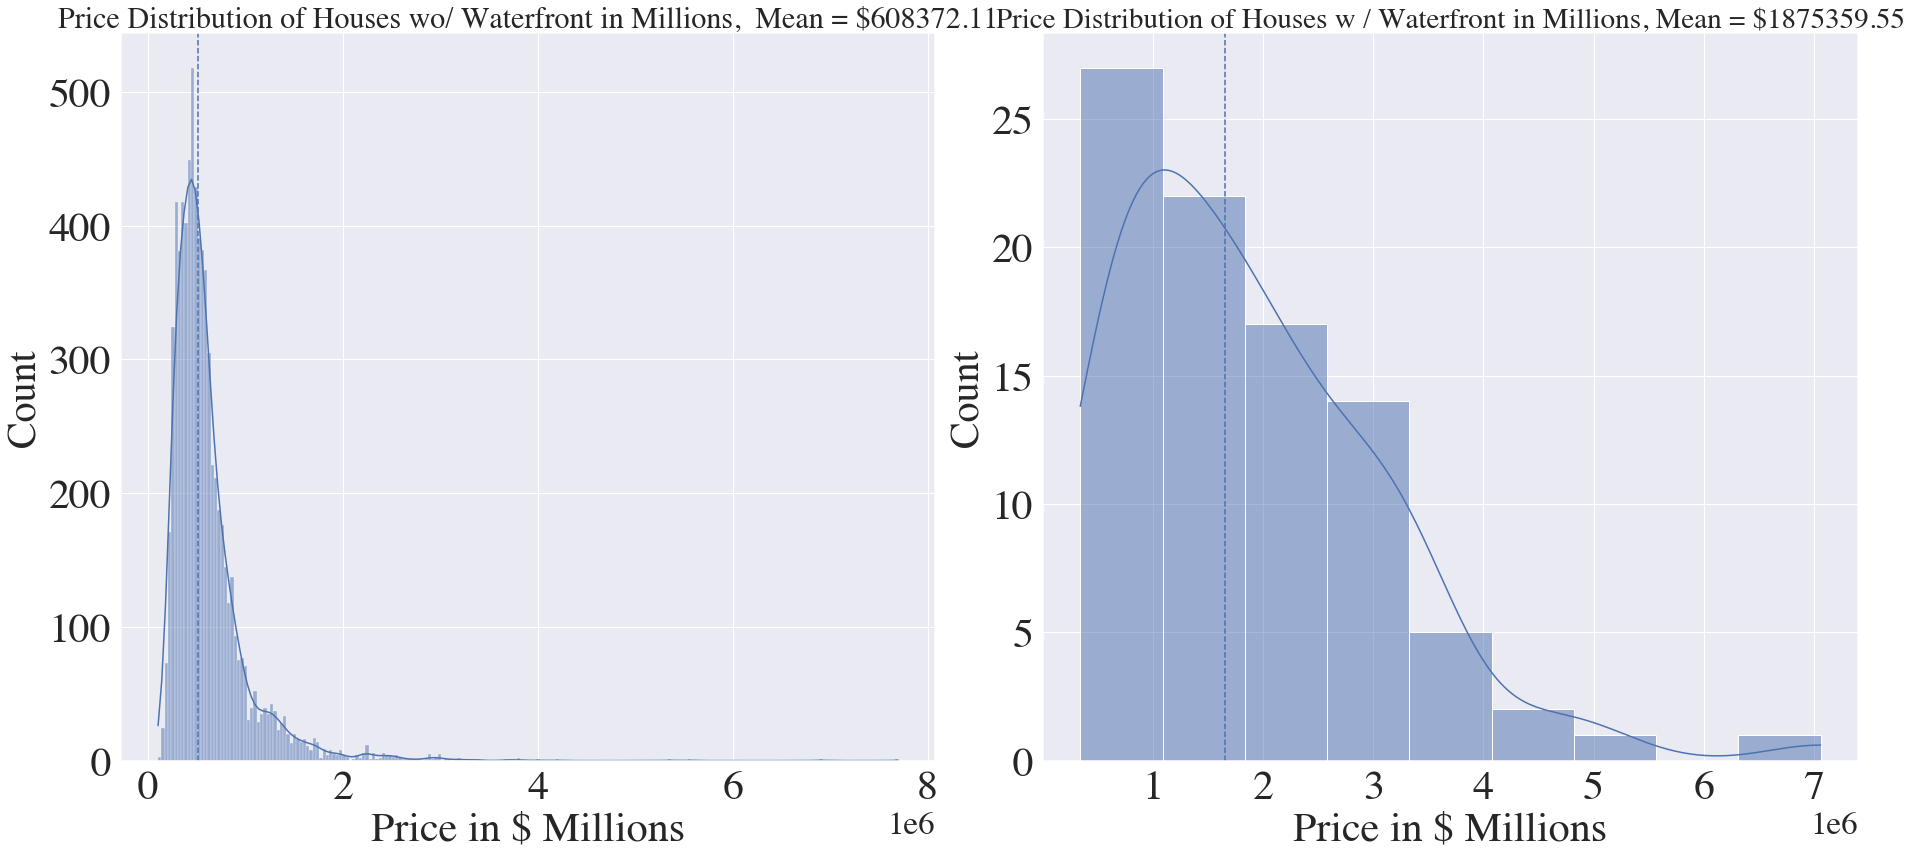

In [80]:
# We will look closely at the distributions of water front and non 
# waterfront side by side. 
plt.figure(figsize=(26, 12))
sns.set(font_scale=3)
isns.set_context(fontfamily="times")
plt.subplot(1,2,1) # two subplots 
sns.histplot(data=waterfront_non, kde=True)

#sns.set(font="Garamond")
plt.axvline(np.median(waterfront_non),color='b', linestyle='--')

m = np.mean(waterfront_non)
m = round(m,2)

plt.title('Price Distribution of Houses wo/ Waterfront in Millions,  Mean = $' +str(m),
          fontsize=30);
plt.xticks(rotation =0, fontsize=42)
plt.yticks(rotation =0, fontsize=42)
plt.xlabel('Price in $ Millions',fontsize=42)
plt.ylabel('Count',fontsize=40)


plt.subplot(1,2,2)
sns.histplot(data=waterfront, kde=True)
plt.axvline(np.median(waterfront),color='b', linestyle='--')

m = np.mean(waterfront)
m = round(m,2)

plt.title('Price Distribution of Houses w / Waterfront in Millions, Mean = $' +str(m),
            fontsize=29);
plt.xticks(rotation =0, fontsize=42)
plt.yticks(rotation =0, fontsize=42)
plt.xlabel('Price in $ Millions',fontsize=42)
plt.ylabel('Count',fontsize=40)

plt.tight_layout()

plt.show()


In [81]:
kc_data['waterfront'] = kc_data['waterfront'].replace(['NO', 'YES'],[0,1])

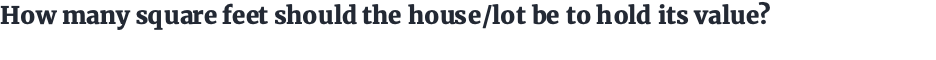

I plotted a scatter plot to show the strong correlation to price and soft living. I also included additional information about the year built to check if any pattern could be captured. But unexpectedly, the year a house was built did not show a relationship to price. 


Text(0, 0.5, 'Price in $ Millions')

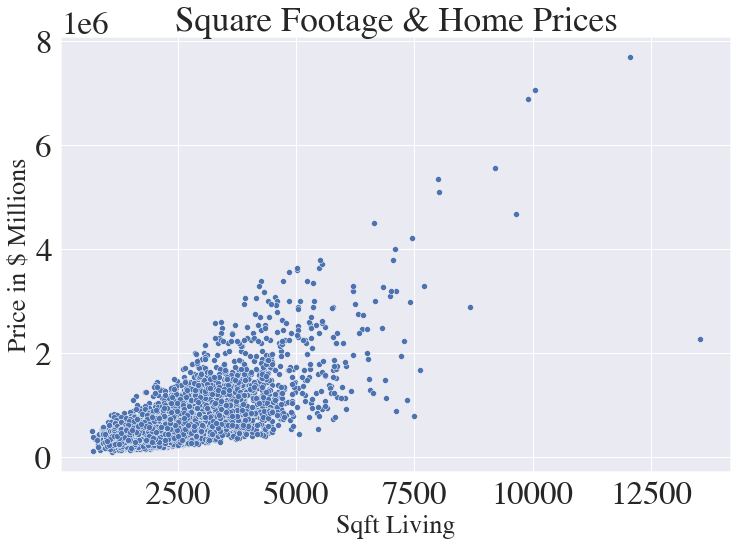

In [82]:
plt.subplots(figsize=(12,8))

isns.set_context(fontfamily="times")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)  
ax = sns.scatterplot(x="sqft_living", y="price",    
                     palette=cmap, sizes=(900, 900),  
                     data=kc_data)  
    

plt.title('Square Footage & Home Prices', fontsize=35)
plt.xlabel('Sqft Living', fontsize=26)
plt.ylabel('Price in $ Millions', fontsize=26)

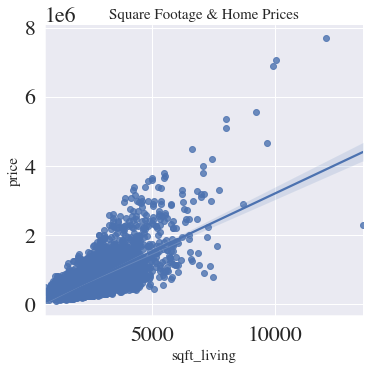

In [421]:
# Plotting for presentaion
plt.figsize=(22,12)

ax=sns.lmplot(x='sqft_living', y='price', data=kc_data)

plt.title("Square Footage & Home Prices");

Text(0, 0.5, 'Price in $ Millions')

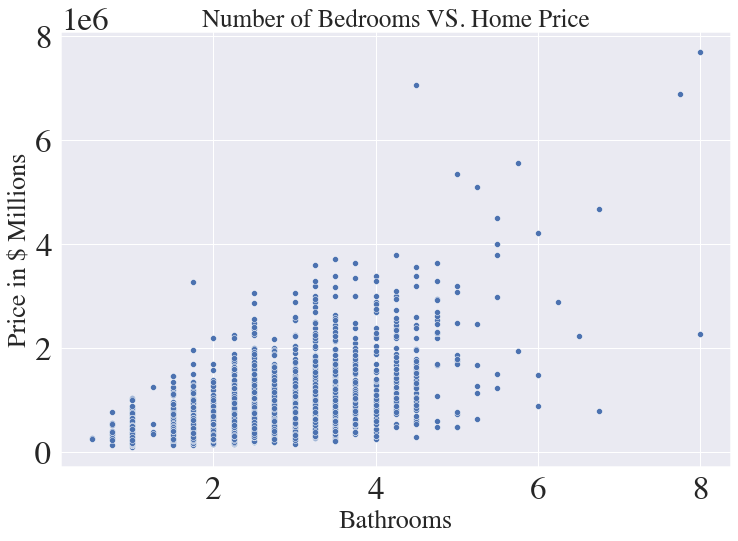

In [83]:
# Plotting number of bathrooms vs home price.
plt.subplots(figsize=(12,8))

isns.set_context(fontfamily="times")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)  
ax = sns.scatterplot(x="bathrooms", y="price",    
                     palette=cmap, sizes=(900, 900),  
                     data=kc_data)  
    

plt.title('Number of Bedrooms VS. Home Price', fontsize=25)
plt.xlabel('Bathrooms', fontsize=26)
plt.ylabel('Price in $ Millions', fontsize=26)

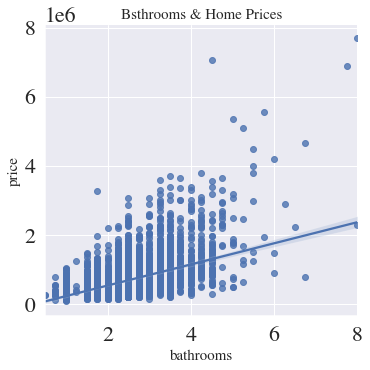

In [423]:
# Plotting for presentaion
plt.figsize=(22,12)

ax=sns.lmplot(x='bathrooms', y='price', data=kc_data)

plt.title("Bsthrooms & Home Prices");

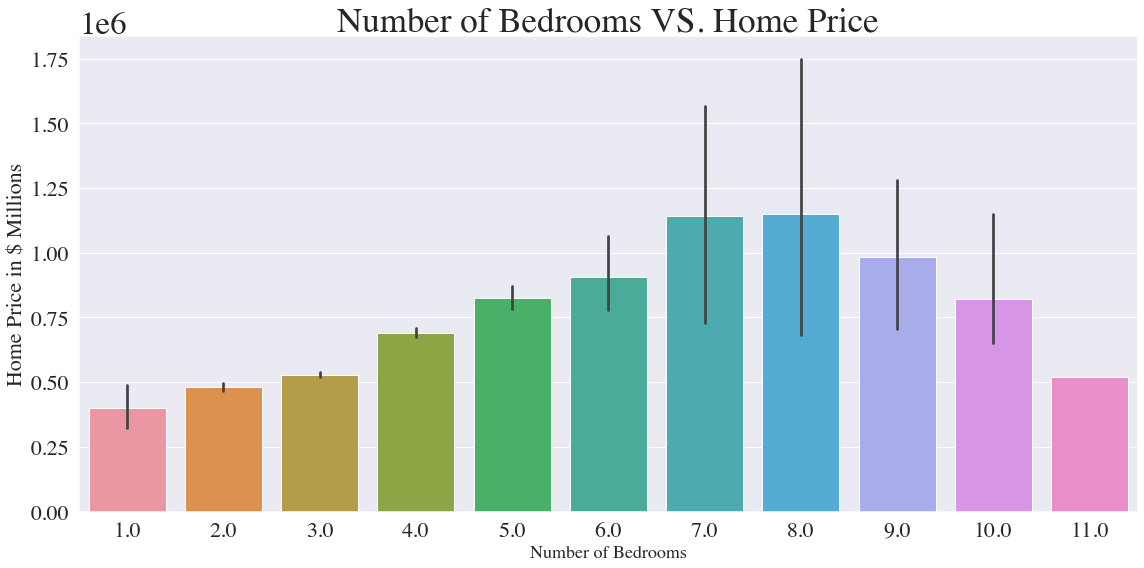

In [84]:
# Plotting number of bedrooms versus home price.
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x="bedrooms", y="price", data=kc_data)

# Lable and define fontsize for main and axis titles.

plt.xlabel('Number of Bedrooms', fontsize=18)
plt.ylabel('Home Price in $ Millions', fontsize=22)
plt.title('Number of Bedrooms VS. Home Price', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=22)

# Set x-axis tick labels.

plt.tight_layout()
plt.show()

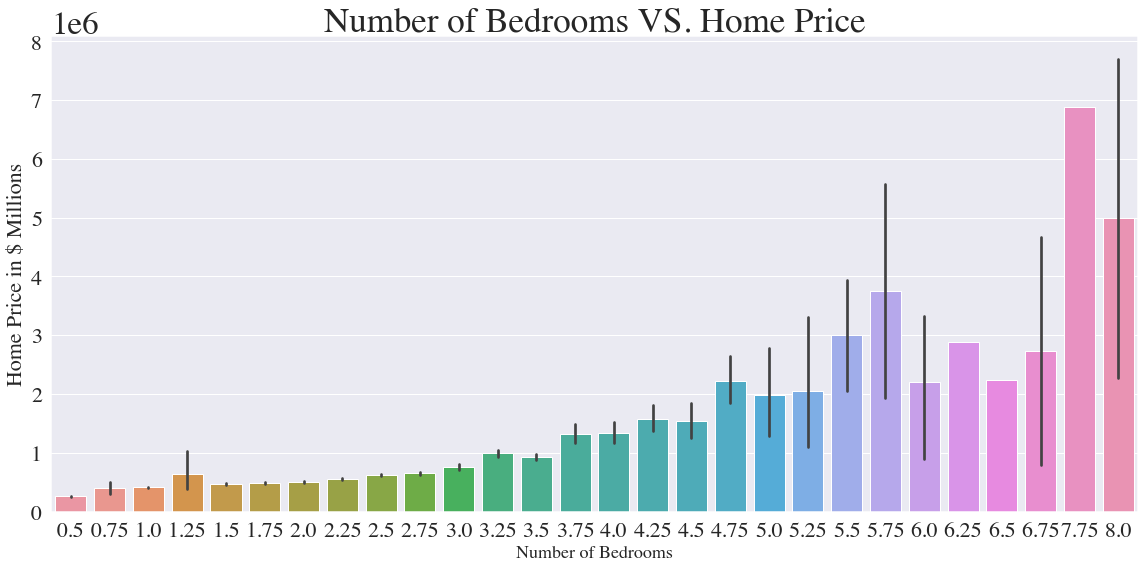

In [85]:
# Plotting number of bathrooms versus home price.

fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x="bathrooms", y="price", data=kc_data)
sns.set_color_codes("pastel")

# Lable and define fontsize for main and axis titles.

plt.xlabel('Number of Bedrooms', fontsize=18)
plt.ylabel('Home Price in $ Millions', fontsize=22)
plt.title('Number of Bedrooms VS. Home Price', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=22)

# Set x-axis tick labels.


plt.tight_layout()
plt.show()

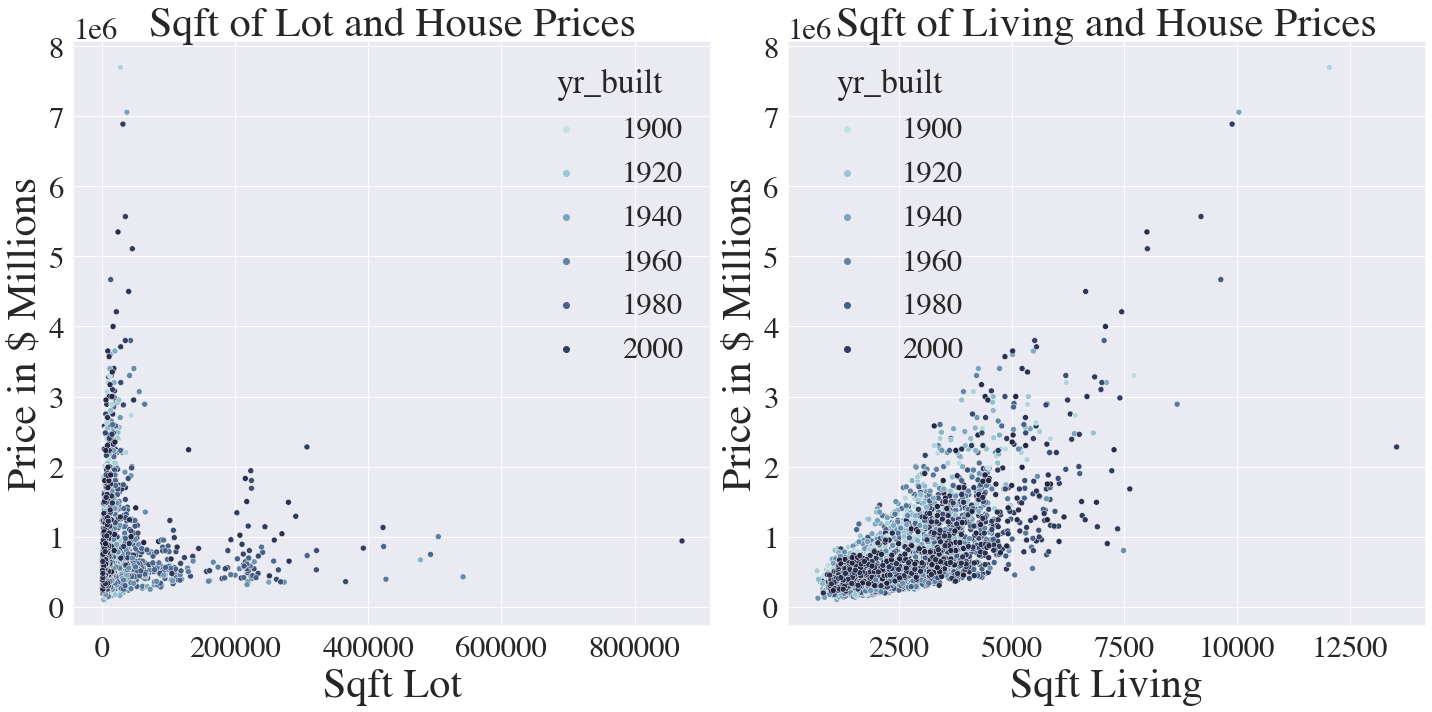

In [86]:
# Comparing the lot versus square living.
 

plt.figure(figsize=(20, 10))


sns.set(font_scale=2.8)

isns.set_context(fontfamily="times")
plt.subplot(1,2,1) # two subplots 



cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)  


ax = sns.scatterplot(x="sqft_lot", y="price",  
                     hue="yr_built",  
                     palette=cmap,  
                     data=kc_data)  


plt.title('Sqft of Lot and House Prices' , fontsize=42)
plt.xlabel('Sqft Lot', fontsize=42)
plt.ylabel('Price in $ Millions', fontsize=42)

plt.subplot(1,2,2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True) 


isns.set_context(fontfamily="times")
ax = sns.scatterplot(x="sqft_living", y="price", hue="yr_built",   
                     palette=cmap, 
                     data=kc_data)  


plt.title('Sqft of Living and House Prices',fontsize=42)
plt.xlabel('Sqft Living', fontsize=42)
plt.ylabel('Price in $ Millions', fontsize=42)

plt.tight_layout()

In [87]:
# Correlation table gives us a precise number which supports the heatmap.

corrTable = kc_data.corr()
corrTable=round(corrTable,2)
corrTable

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
id,1.00,-0.02,0.01,0.00,-0.02,-0.13,0.02,-0.00,0.01,-0.02,...,-0.02,0.01,-0.00,-0.03,-0.03,-0.00,-0.01,-0.12,0.00,-0.00
price,-0.02,1.00,0.26,0.53,0.72,0.07,0.35,0.31,0.45,0.08,...,0.41,-0.01,0.15,-0.06,0.24,0.02,0.60,0.05,0.00,-0.00
bedrooms,0.01,0.26,1.00,0.46,0.52,0.06,0.08,-0.00,0.10,0.07,...,0.46,0.03,0.05,-0.15,0.00,0.13,0.33,0.04,-0.01,0.00
bathrooms,0.00,0.53,0.46,1.00,0.70,0.13,0.47,0.09,0.24,-0.06,...,0.41,0.39,0.09,-0.18,0.03,0.19,0.51,0.11,-0.03,0.01
sqft_living,-0.02,0.72,0.52,0.70,1.00,0.23,0.33,0.15,0.37,0.03,...,0.72,0.17,0.09,-0.20,0.03,0.23,0.72,0.21,-0.03,0.02
sqft_lot,-0.13,0.07,0.06,0.13,0.23,1.00,-0.02,0.05,0.07,-0.01,...,0.16,0.09,0.00,-0.18,-0.11,0.33,0.20,0.79,0.01,-0.02
floors,0.02,0.35,0.08,0.47,0.33,-0.02,1.00,0.05,0.12,-0.16,...,-0.11,0.29,0.07,0.09,0.10,-0.05,0.18,-0.02,-0.03,0.03
waterfront,-0.00,0.31,-0.00,0.09,0.15,0.05,0.05,1.00,0.38,0.01,...,0.12,-0.01,0.08,0.01,-0.03,-0.01,0.13,0.05,-0.01,0.01
view,0.01,0.45,0.10,0.24,0.37,0.07,0.12,0.38,1.00,0.03,...,0.29,-0.01,0.09,0.06,-0.02,-0.04,0.41,0.06,-0.01,-0.00
condition,-0.02,0.08,0.07,-0.06,0.03,-0.01,-0.16,0.01,0.03,1.00,...,0.16,-0.35,-0.10,-0.02,-0.01,-0.05,0.01,-0.01,-0.06,0.02


#### It’s evident that, unlike living space, lot size does not show a  correlation to price.

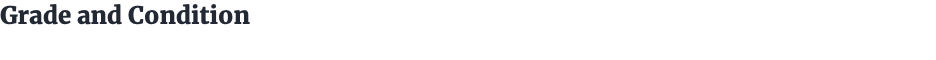

In [88]:
# Checking unique values for condition 
kc_data['condition'].unique()

array([3, 5, 4, 1, 2])

In [89]:
# Grouping condition
group_condition = kc_data.groupby(['condition']).mean()
group_condition = pd.DataFrame.reset_index(group_condition)
group_condition

,condition,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
0,1,5.337300e+09,324333.333333,3.333333,1.666667,1850.000000,19043.000000,1.000000,0.000000,1.000000,...,716.666667,1939.000000,0.000000,98066.000000,47.655767,-122.216333,1916.666667,9508.333333,2014.333333,4.333333
1,2,5.097944e+09,417773.460000,3.200000,1.800000,1861.400000,26088.940000,1.050000,0.020000,1.140000,...,512.400000,1958.900000,79.280000,98072.180000,47.506904,-122.221080,1751.000000,20294.940000,2014.400000,6.080000
2,3,4.642844e+09,612184.257477,3.514252,2.350058,2313.367290,12714.375000,1.415421,0.011215,1.379439,...,690.368224,1973.531776,124.420327,98091.615654,47.588666,-122.253732,2022.512383,11173.595561,2014.333879,6.600234
3,4,4.575608e+09,603975.530814,3.590193,2.118534,2281.827260,14584.501125,1.173639,0.011696,1.428250,...,789.993702,1956.277103,32.132254,98080.241565,47.568642,-122.251511,2020.325686,12193.019793,2014.314890,6.557805
4,5,4.486960e+09,751617.242015,3.691267,2.318182,2425.753071,11056.217445,1.279484,0.017199,1.449631,...,873.671990,1945.286241,34.056511,98096.299754,47.598004,-122.279098,2036.651106,9833.706388,2014.234644,6.807125


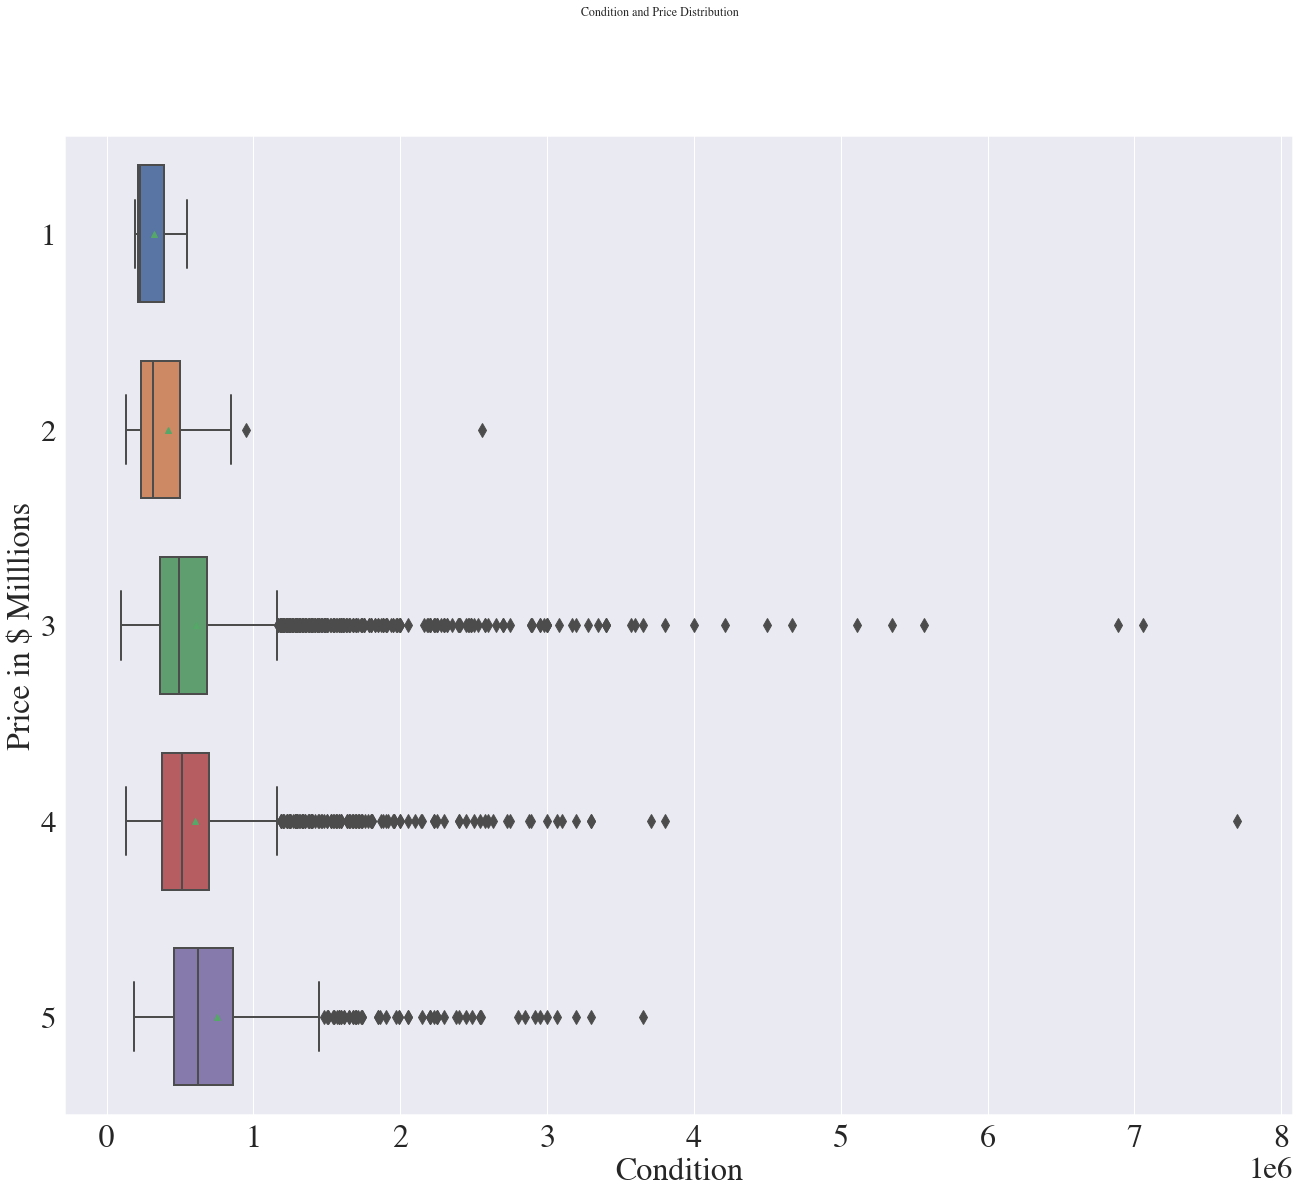

In [90]:
# Checking distribution of condition 

fig, axes = plt.subplots(1, 1, figsize=(22,18))

isns.set_context(fontfamily="times")

fig.suptitle('Condition and Price Distribution')
sns.boxplot(y = kc_data['condition'], x=kc_data['price'], 
            width = 0.7, orient ='h', showmeans = True, 
            linewidth = 2, fliersize =10)

plt.xlabel('Condition', fontsize=32)
plt.ylabel('Price in $ Milllions', fontsize=32)
plt.xticks(fontsize=32,rotation = 0);




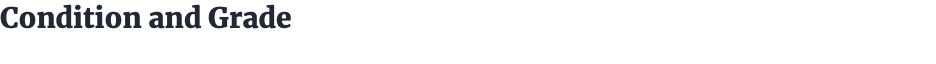

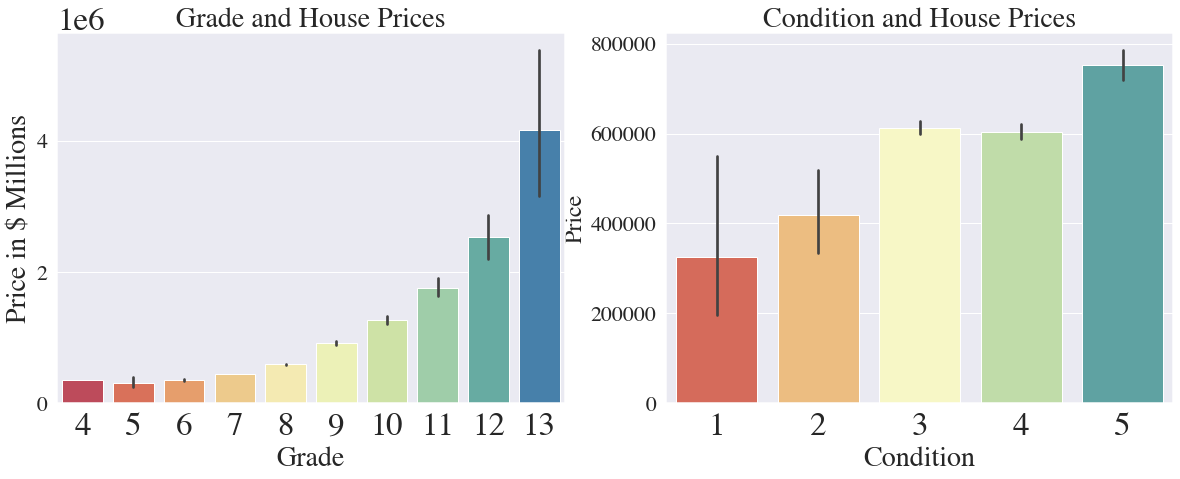

In [91]:
sns.set(font_scale=3)
isns.set_context(fontfamily="times")
plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Condition')

sns.barplot(x='condition', y='price', data=kc_data, 
            palette='Spectral')
plt.title('Condition and House Prices' , fontsize=28)
plt.xlabel('Condition', fontsize=28)
plt.ylabel('Price', fontsize=24)
plt.yticks(fontsize=22,rotation = 0);

plt.subplot(the_grid[0, 0], title='Grade')

sns.barplot(x='grade',y='price', data=kc_data, palette='Spectral')


plt.title('Grade and House Prices' , fontsize=28)
plt.xlabel('Grade', fontsize=28)
plt.ylabel('Price in $ Millions', fontsize=28)
plt.yticks(fontsize=22,rotation = 0);
fig.tight_layout()
plt.show()


The higher the grade and condition the higher the price. However the price increases significantly with the increase of the house’s grade.

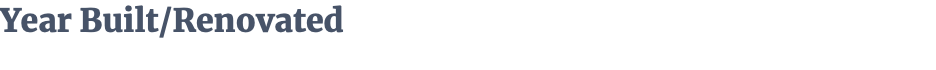

Looking closely, I build a line plot to access wether here was any trend with year build but as the graph shows there was not. Newer home did not necessarily suggest that prices increases. From 1980 to 2000 house prices rise from 700K to $1.1 million.

<AxesSubplot:xlabel='yr_built', ylabel='price'>

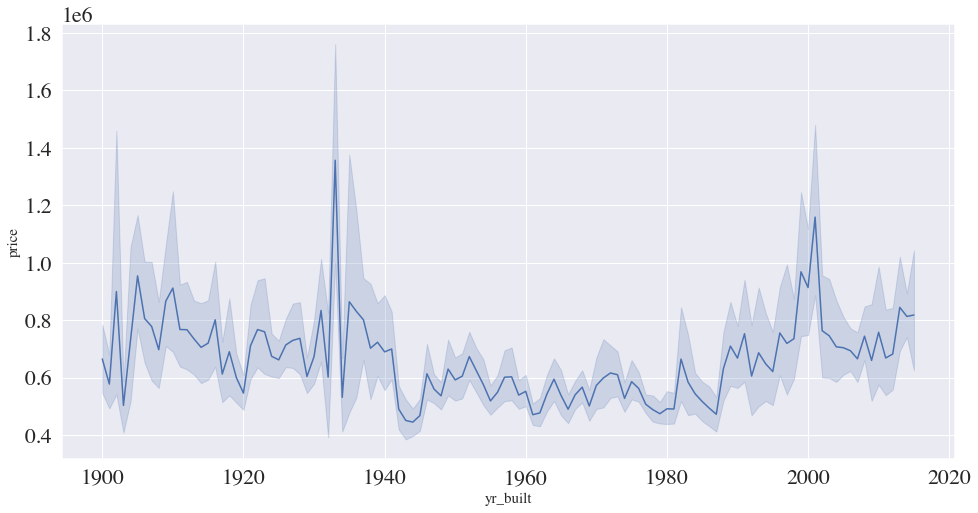

In [92]:
# Plotting line plot
sns.set_style('whitegrid')
sns.set_color_codes("pastel")
sns.set(font_scale=2)
isns.set_context(fontfamily="times")

fig, ax = plt.subplots(1,1, figsize=(16,8))

sns.lineplot(data=kc_data, x="yr_built", y="price")

### Year Renovated

In [93]:
# Checking years
kc_data.yr_renovated.unique()

array([1991,    0, 2002, 1992, 1994, 1978, 2005, 2003, 1984, 2011, 2014,
       2013, 1988, 1995, 1977, 1998, 1970, 1989, 1990, 2004, 1986, 2007,
       1987, 2006, 2000, 1979, 1997, 1983, 2015, 2012, 2008, 1962, 1999,
       2001, 1985, 1980, 1993, 1955, 1996, 2010, 2009, 1969, 1940, 1975,
       1957, 1956, 1973, 1968, 1982, 1934, 1965, 1964])

In [94]:
kc_data['yr_renovated'].value_counts()

0       7052
2014      41
2013      17
2000      14
2008      13
2003      12
2005      12
2006      12
2004      11
2007      10
1990       9
1996       9
2010       9
2015       8
1987       8
1999       8
1991       8
1998       7
1984       7
2001       7
1970       6
2009       6
2002       6
1993       6
1986       6
2011       5
1992       5
1983       5
1989       4
1985       4
1995       4
1988       4
1994       3
1975       3
1982       3
1977       3
1980       3
1979       2
1969       2
1965       2
2012       2
1997       2
1964       1
1955       1
1956       1
1978       1
1962       1
1968       1
1940       1
1973       1
1957       1
1934       1
Name: yr_renovated, dtype: int64

Since the majority of the data shows 0 for the houses, I assume that these houses were not renovated. 

In [95]:
year_price = kc_data[['yr_renovated','price']]
year_price.head()

,yr_renovated,price
1,1991,538000.0
3,0,604000.0
5,0,1230000.0
8,0,229500.0
11,0,468000.0


In [96]:
# Removing the renovation years that are zero - these houses were 
# not renovated
reno_years  = year_price.replace(0, pd.np.nan).dropna(axis=0, 
                                how='any').fillna(0).astype(int)

In [97]:
'''Creating a new data frame - extracting year renovated and price. 
Grouping by year renovated and plotting a bar graph into the avert 
price for a given year.'''
group_yr_reno= reno_years.groupby(['yr_renovated']).mean()
group_yr_reno = pd.DataFrame.reset_index(group_yr_reno)

<AxesSubplot:title={'center':'Years Renovated and House Prices'}, xlabel='Years Renovated', ylabel='Price in $ Millions'>

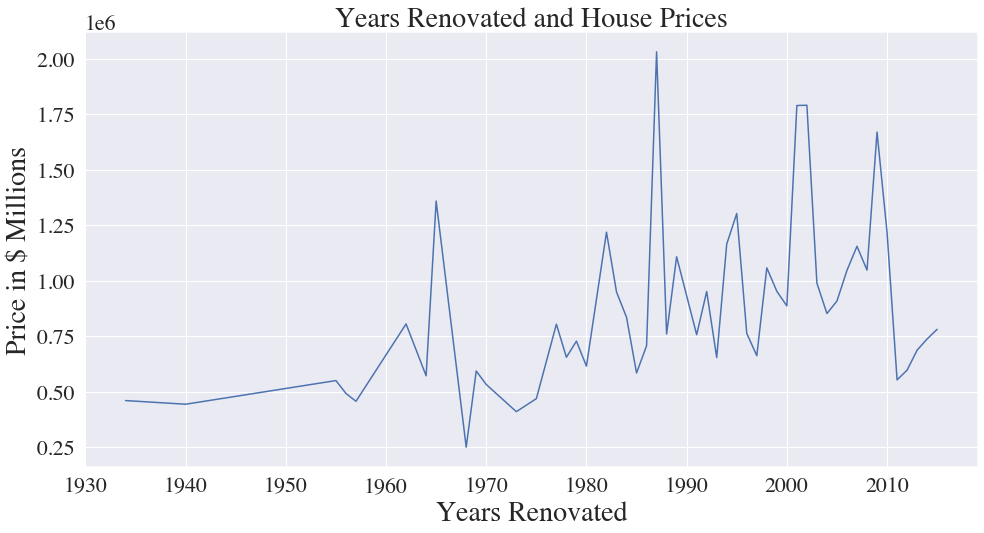

In [98]:
'''I build a line plot to access wether here was any trend with year 
renovated but as the graph shows there was not.'''

sns.set_style('whitegrid')
sns.set_color_codes("pastel")
sns.set(font_scale=2)
isns.set_context(fontfamily="times")

fig, ax = plt.subplots(1,1, figsize=(16,8))

plt.title('Years Renovated and House Prices' , fontsize=28)
plt.xlabel('Years Renovated', fontsize=28)
plt.ylabel('Price in $ Millions', fontsize=28)

sns.lineplot(data=group_yr_reno, x="yr_renovated", y="price")

In [99]:
# Let's check yr_built stats and asses the virable. 
top20p.yr_built.describe()

count    1474.000000
mean     1965.005427
std        33.081355
min      1900.000000
25%      1937.000000
50%      1967.000000
75%      1996.000000
max      2015.000000
Name: yr_built, dtype: float64

In [100]:
# Here are the  bins  based on the values observed above. 
# 5 values will result in 4 bins

bins = [0, 1952, 1975, 1990, 1997, 2015]

#We'll pd.cut method to separate data into bins.
bins_yr_built = pd.cut(top20p['yr_built'], bins)

#We'll use .cat.as_unordered() method transforming the data to 
# ordered categories.
bins_yr_built = bins_yr_built.cat.as_unordered()
#bins_yr_built.head()

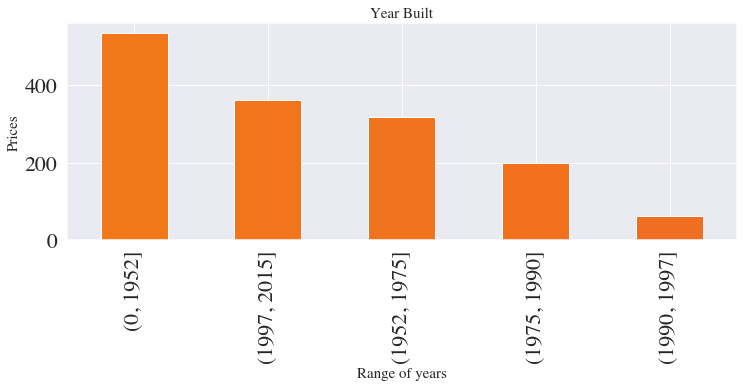

In [101]:
#Let's visualize the bins
fig, ax = plt.subplots(figsize=(15,6))
from matplotlib import cm

color = cm.inferno_r(np.linspace(.3, .5, 40))
isns.set_context(fontfamily="times")
bins_yr_built.value_counts().plot(kind='bar',stacked=True, color=color,
                                  legend=False, figsize=(12, 4))
plt.xlabel('Range of years')
plt.ylabel('Prices')
plt.title('Year Built')
#plt.legend()
plt.show()

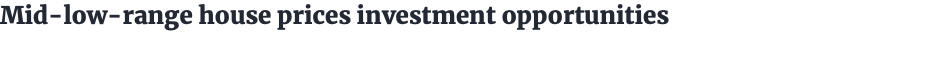

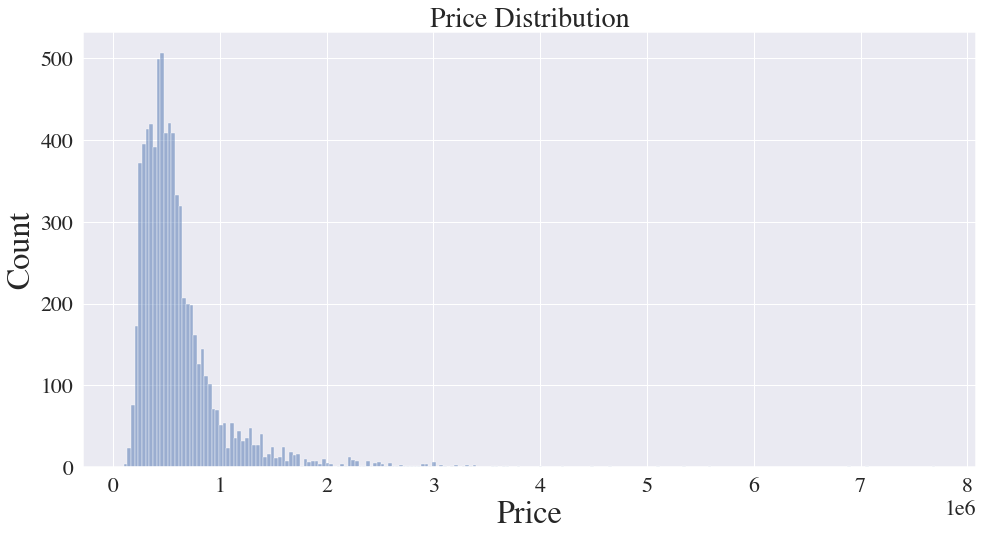

In [102]:
# Checking the distribution for house prices.

fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(kc_data["price"],alpha=.5)
plt.title('Price Distribution',  fontsize=28) 
plt.xlabel('Price', fontsize =32)
plt.ylabel('Count', fontsize =32)
plt.show()

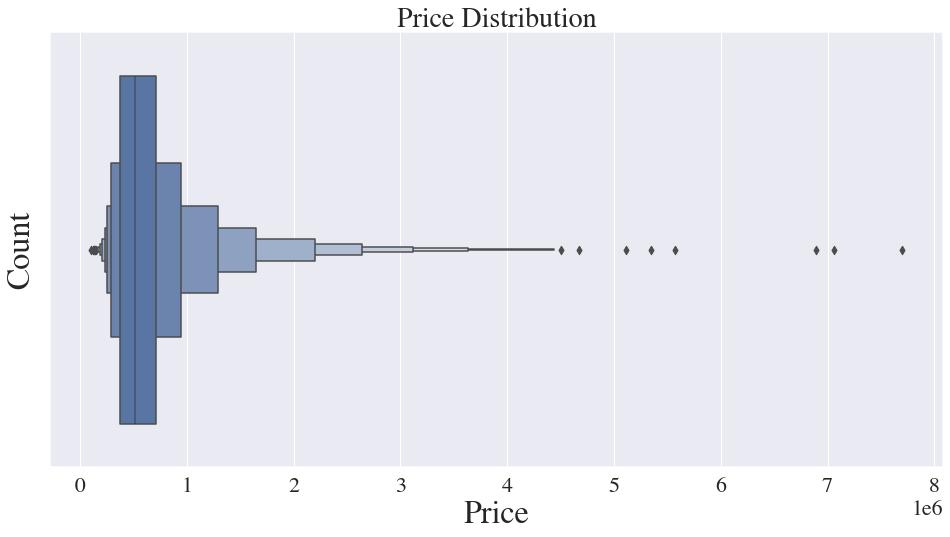

In [103]:
# Checking the distribution for house prices.

fig, ax = plt.subplots(figsize=(16, 8))
sns.boxenplot(x=kc_data["price"])
plt.title('Price Distribution',  fontsize=28) 
plt.xlabel('Price', fontsize =32)
plt.ylabel('Count', fontsize =32)
plt.show()

In [104]:
kc_data['price'].unique()

array([ 538000.,  604000., 1230000., ...,  747450.,  608500., 3570000.])

The majority of the houses fall between 250K to 1 million dollars. 


In [105]:
# Filter the dataset to get mid range prices 
mid_price = kc_data[(kc_data['price'] < np.quantile(kc_data['price'], 0.9)) 
                    & (kc_data['bathrooms'].isin(range(3, 6)))
                    & (kc_data['view'].isin(range(3,5))) 
                    & (kc_data['sqft_living'].isin(range(2000,5700)))]

# View summary statistics
mid_price.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
count,3.400000e+01,34.000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,4.810090e+09,718650.000,4.323529,3.176471,3282.235294,17310.029412,1.602941,0.0,3.352941,3.382353,...,1003.411765,1969.588235,293.588235,98108.147059,47.553541,-122.276941,2426.176471,12208.529412,2014.205882,6.676471
std,2.865201e+09,192865.463,1.036328,0.386953,672.085089,18885.111257,0.519023,0.0,0.485071,0.603761,...,417.000118,27.358581,717.720724,64.887377,0.098861,0.113351,626.655455,11375.331300,0.410426,3.345921
min,2.690010e+08,315000.000,3.000000,3.000000,2350.000000,3900.000000,1.000000,0.0,3.000000,3.000000,...,180.000000,1908.000000,0.000000,98006.000000,47.344800,-122.464000,1350.000000,4000.000000,2014.000000,1.000000
25%,2.358001e+09,565250.000,4.000000,3.000000,2792.500000,6250.000000,1.000000,0.0,3.000000,3.000000,...,792.500000,1957.750000,0.000000,98056.000000,47.509225,-122.356750,2015.000000,5612.500000,2014.000000,5.000000
50%,4.058801e+09,749500.000,4.000000,3.000000,3140.000000,9734.500000,1.750000,0.0,3.000000,3.000000,...,965.000000,1970.000000,0.000000,98115.000000,47.552000,-122.270000,2305.000000,7609.500000,2014.000000,6.000000
75%,7.380576e+09,867000.000,5.000000,3.000000,3687.500000,18136.500000,2.000000,0.0,4.000000,4.000000,...,1297.500000,1988.000000,0.000000,98175.000000,47.639300,-122.230000,2822.500000,15749.250000,2014.000000,9.750000
max,9.523104e+09,1030000.000,7.000000,4.000000,4660.000000,80471.000000,3.000000,0.0,4.000000,5.000000,...,2060.000000,2013.000000,2014.000000,98199.000000,47.715300,-121.913000,3880.000000,64033.000000,2015.000000,12.000000


In [106]:
mid_price= mid_price[['price','sqft_living','zipcode']]

In [107]:
group_mid_zip = mid_price.groupby(['zipcode'])['price'].mean()

In [108]:
group_mid_zip = mid_price.sort_values(by= 'price', ascending = False)
group_mid_zip.head()

,price,sqft_living,zipcode
20056,1030000.0,3880,98034
7069,990000.0,2550,98199
1034,980000.0,3680,98199
17480,959750.0,3060,98008
10581,951250.0,2710,98199


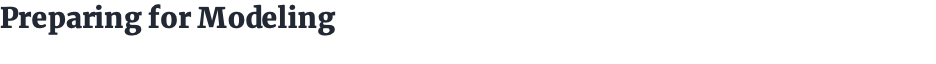

In order to prepare for the model prediction, I will be dealing with the following elements:

       * Split the data- dependent(X) and independent(y)
       * Handle categorical valuables by using dummy encoding.
       * Ensure that there is no  multicollinearity that none of the independent variables are correlated.
       * Scale the data.


In [344]:
kc_data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dateyear         0
date_month       0
dtype: int64

In [345]:
kc_data.dropna(subset=['bedrooms'], inplace=True)

In [346]:
kc_data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dateyear         0
date_month       0
dtype: int64

### Split the data: dependent(X) and independent(y)

#### I will split the data into dependent and independent variable X and y. I will make sure there are no new NaNs values. 


In [347]:
# Split features X and target y
X = kc_data.drop('price', axis = 1)
y = kc_data['price']

In [348]:
# Creating a copy of X
X_copy = X.copy()

### Adding New Columns

#### I am adding new columns where the model can understand better the values. Year built and renovated would be hard to the model to understand therefore, I will subtract the year renovated from the year the house was sold. I will do the same for the year the house was built. The new column will have the number of years as opposed to just four digit year. 

In [349]:
# Adding a column of number of years house has been built
X['houselife'] = X['dateyear']- X['yr_built']

In [350]:
# Creating a new column called ‘renovated’. Subtracting date year from
# year renovated. 
X['renovated'] = X['yr_renovated'] - X['dateyear']

In [351]:
# There a lot of 0s in the year renovated which we will replace with 
# the year the house was sold because we assume that the respective 
# house was not renovated.  

for indx, row in X.iterrows():
    if row['yr_renovated']==0:
        X['yr_renovated'].loc[indx] = row['dateyear']

In [352]:
X.drop(['yr_built','yr_renovated','dateyear'],axis=1,inplace=True)

In [353]:
# Dropping 'id' -since it has so meaningful value.
X.drop(['id'],axis=1,inplace=True)

### Checking for Multicollinearity 

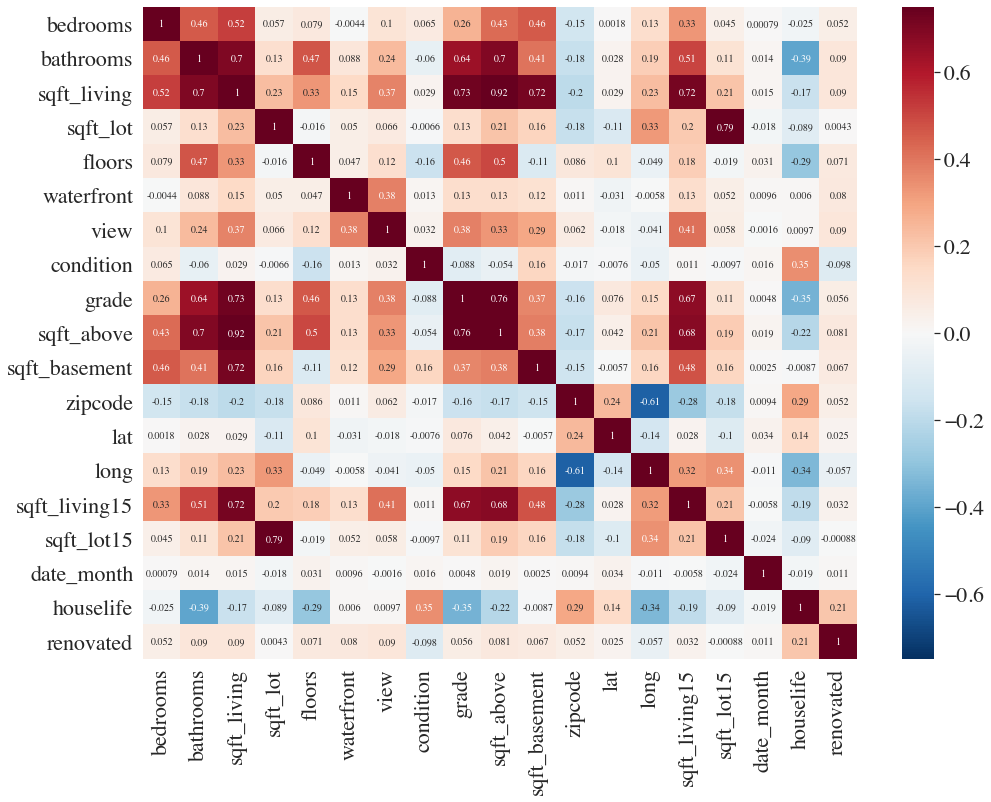

In [354]:
corr  = X.corr()
plt.figure(figsize=(16, 12))
sns.set(font_scale=2)
isns.set_context(fontfamily="times")
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-0.75, 
                      vmax=0.75, cmap="RdBu_r")

#### Check VIF Score 

#### Creating a function that generates a list of two variables and the respective correlation to check for multicoliniartiy. I will not include a correlation higher than 0.6. 


In [355]:
# We will extract all the variables beside the target variable. 
kc_pred = X
kc_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,date_month,houselife,renovated
1,3.0,2.25,2570,7242,2.0,0,1,3,7,2170,400,98125,47.7210,-122.319,1690,7639,12,63,-23
3,4.0,3.00,1960,5000,1.0,0,1,5,7,1050,910,98136,47.5208,-122.393,1360,5000,12,49,-2014
5,4.0,4.50,5420,101930,1.0,0,1,3,11,3890,1530,98053,47.6561,-122.005,4760,101930,5,13,-2014
8,3.0,1.00,1780,7470,1.0,0,1,3,7,1050,730,98146,47.5123,-122.337,1780,8113,4,55,-2015
11,2.0,1.00,1160,6000,1.0,0,1,4,7,860,300,98115,47.6900,-122.292,1330,6000,5,72,-2014


In [356]:
# Double checking null values 
kc_pred.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_month       0
houselife        0
renovated        0
dtype: int64

In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(kc_pred):
    
    kc_pred_temp = kc_pred.copy()
    
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = kc_pred_temp.columns
    VIF_Scores["VIF_Scores"] = [variance_inflation_factor(kc_pred_temp.values,i)
                                for i in range(kc_pred_temp.shape[1])]
    return VIF_Scores

vif_scores(kc_pred)

,Independent Features,VIF_Scores
0,bedrooms,2.330827e+01
1,bathrooms,2.673248e+01
2,sqft_living,inf
3,sqft_lot,3.294036e+00
4,floors,1.648899e+01
5,waterfront,1.194805e+00
6,view,4.505538e+00
7,condition,3.287466e+01
8,grade,1.657368e+02
9,sqft_above,inf


In [358]:
# Dropping high VIF
X.drop(['sqft_living15', 'sqft_lot15', 'houselife','sqft_above','sqft_basement'], axis = 1,inplace =True)

In [359]:
# Running vif score one more time
vif_scores(X)

,Independent Features,VIF_Scores
0,bedrooms,2.303621e+01
1,bathrooms,2.359679e+01
2,sqft_living,2.400702e+01
3,sqft_lot,1.377412e+00
4,floors,1.261622e+01
5,waterfront,1.191775e+00
6,view,4.236097e+00
7,condition,2.829246e+01
8,grade,1.352769e+02
9,zipcode,2.073803e+06


### Categorical Values 

#### Using get_dummies method in order to create a column for waterfront and not waterfront homes. Also, each zipcode will have their own column. This way the model can work better with such data.


#### Here are all the categorical features which we will convert to dummy variables by using get_dummies method.

* Zipcode
* Waterfront



In [360]:
# Creating a column of yes_waterfront and no_waterfront 
X = pd.get_dummies(X, columns=['waterfront'])

In [361]:
# Creating a column for each zipcode
X = pd.get_dummies(X, columns=['zipcode'])

In [362]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,lat,long,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1,3.0,2.25,2570,7242,2.0,1,3,7,47.7210,-122.319,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.00,1960,5000,1.0,1,5,7,47.5208,-122.393,...,0,0,0,0,0,0,0,0,0,0
5,4.0,4.50,5420,101930,1.0,1,3,11,47.6561,-122.005,...,0,0,0,0,0,0,0,0,0,0
8,3.0,1.00,1780,7470,1.0,1,3,7,47.5123,-122.337,...,1,0,0,0,0,0,0,0,0,0
11,2.0,1.00,1160,6000,1.0,1,4,7,47.6900,-122.292,...,0,0,0,0,0,0,0,0,0,0


#### Implementing  VIF Score function using statsmodels.
 
VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.


In [363]:
# Dropping more variables that have large VIF

In [364]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7369 entries, 1 to 21591
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       7369 non-null   float64
 1   bathrooms      7369 non-null   float64
 2   sqft_living    7369 non-null   int64  
 3   sqft_lot       7369 non-null   int64  
 4   floors         7369 non-null   float64
 5   view           7369 non-null   int64  
 6   condition      7369 non-null   int64  
 7   grade          7369 non-null   int64  
 8   lat            7369 non-null   float64
 9   long           7369 non-null   float64
 10  date_month     7369 non-null   int64  
 11  renovated      7369 non-null   int64  
 12  waterfront_0   7369 non-null   uint8  
 13  waterfront_1   7369 non-null   uint8  
 14  zipcode_98001  7369 non-null   uint8  
 15  zipcode_98002  7369 non-null   uint8  
 16  zipcode_98003  7369 non-null   uint8  
 17  zipcode_98004  7369 non-null   uint8  
 18  zipcode

In [365]:
# Print Shape 
print(X.shape, y.shape)

(7369, 84) (7369,)


### Scaling the data

In [366]:
# Create a list for my columns
colname = list(X)

In [367]:
# scaling the data with StandardScale() 

sc_X = StandardScaler() # call scaling
sc_X.fit(X) # fit the funciton
sc_X = pd.DataFrame(sc_X.transform(X), columns = X.columns) # transform the data & keep columns

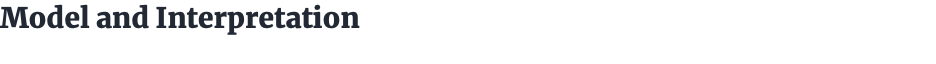

### Baseline model (Most correlated features)

In [368]:
# Check shape
y.shape

(7369,)

In [369]:
# Restting index to align the data

X.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)

In [370]:
# Run OLS Regression - using the most correlated features for the model
# X_train_base = X_train[best_features_base]
#Fitting the training data

X_ols = sm.add_constant(sc_X) 
model_base = sm.OLS(y, X_ols).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     348.2
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:17:09   Log-Likelihood:            -1.0050e+05
No. Observations:                7369   AIC:                         2.012e+05
Df Residuals:                    7286   BIC:                         2.017e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.249e+05   3345.369    186.802      0.000    6.18e+05    6.31e+05
bedrooms      -3.049e+04   3066.734     -9.944      0.000   -3.65e+04   -2.45e+04
bathrooms      8372.6618   3802.187      2.202      0.028     919.274    1.58e+04
sqft_living    2.187e+05   4580.577     47.735      0.000     2.1e+05    2.28e+05
sqft_lot      -5284.6748   2812.354     -1.879      0.060   -1.08e+04     228.354
floors        -1.706e+04   3222.799     -5.293      0.000   -2.34e+04   -1.07e+04
view           4.942e+04   2938.841     16.817      0.000    4.37e+04    5.52e+04
condition      2.398e+04   2540.435      9.440      0.000     1.9e+04     2.9e+04
grade          9.012e+04   4187.259     21.524      0.000    8.19e+04    9.83e+04
lat            3.206e+04   1.86e+04      1.724      0.085   -4398.335    6.85e+04
long           6241.3826   1.52e+04      0.409      0.682   -2.36e+04    3.61e+04
date_month    -9905.8891   2404.746     -4.119      0.000   -1.46e+04   -5191.891
renovated      1.464e+04   2461.509      5.948      0.000    9816.436    1.95e+04
waterfront_0   1.075e+16   2.02e+16      0.532      0.595   -2.88e+16    5.03e+16
waterfront_1   1.075e+16   2.02e+16      0.532      0.595   -2.88e+16    5.03e+16
zipcode_98001 -3.633e+16   6.83e+16     -0.532      0.595    -1.7e+17    9.75e+16
zipcode_98002 -2.171e+16   4.08e+16     -0.532      0.595   -1.02e+17    5.83e+16
zipcode_98003 -3.811e+16   7.16e+16     -0.532      0.595   -1.78e+17    1.02e+17
zipcode_98004 -4.662e+16   8.76e+16     -0.532      0.595   -2.18e+17    1.25e+17
zipcode_98005 -3.633e+16   6.83e+16     -0.532      0.595    -1.7e+17    9.75e+16
zipcode_98006 -6.186e+16   1.16e+17     -0.532      0.595    -2.9e+17    1.66e+17
zipcode_98007  -2.46e+16   4.62e+16     -0.532      0.595   -1.15e+17     6.6e+16
zipcode_98008 -4.447e+16   8.36e+16     -0.532      0.595   -2.08e+17    1.19e+17
zipcode_98010 -1.642e+16   3.09e+16     -0.532      0.595   -7.69e+16    4.41e+16
zipcode_98011 -3.373e+16   6.34e+16     -0.532      0.595   -1.58e+17    9.05e+16
zipcode_98014 -1.693e+16   3.18e+16     -0.532      0.595   -7.93e+16    4.54e+16
zipcode_98019 -2.246e+16   4.22e+16     -0.532      0.595   -1.05e+17    6.03e+16
zipcode_98022  -2.32e+16   4.36e+16     -0.532      0.595   -1.09e+17    6.23e+16
zipcode_98023 -5.461e+16   1.03e+17     -0.532      0.595   -2.56e+17    1.47e+17
zipcode_98024 -1.642e+16   3.09e+16     -0.532      0.595   -7.69e+16    4.41e+16
zipcode_98027  -5.49e+16   1.03e+17     -0.532      0.595   -2.57e+17    1.47e+17
zipcode_98028 -4.041e+16   7.59e+16     -0.532      0.595   -1.89e+17    1.08e+17
zipcode_98029 -2.718e+16   5.11e+16     -0.532      0.595   -1.27e+17    7.29e+16
zipcode_98030 -3.036e+16   5.71e+16     -0.532      0.595   -1.42e+17    8.15e+16
zipcode_98031 -3.422e+16   6.43e+16     -0.532   

In [371]:
# predict on X
y_pred = model_base.predict(X_ols)
print(y_pred)

0        603024.0
1        523280.0
2       1397552.0
3        299408.0
4        471216.0
          ...    
7364     464176.0
7365    1380816.0
7366     544176.0
7367     975984.0
7368     455388.0
Length: 7369, dtype: float64


### RMSE/MSE

In [374]:
rms_1 = mean_squared_error(y, y_pred)
print('MSE',rms_1)

MSE 41124827981.192696


In [375]:
rmse_1 = np.sqrt(rms_1)
print('RMSE',rmse_1)

RMSE 202792.5737821597


#### R Squared is 79%  - let’s try to use the stepwise_selection function to see if the R Squared increases. Also I would like to remove the features that their p-value is more than 0.05.

### Model 2, using stepwise_selection function

Using statsmodels stepwise selection in order to select features based on its p-values.

In [376]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        #worst_pval = pvalues.max() # null if pvalues is empty
        #if worst_pval > threshold_out:
         #   changed=True
          #  worst_feature = pvalues.argmax()
           # included.remove(worst_feature)
           # if verbose:
            #    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

 

      

In [377]:
# result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

resulting features:
['bathrooms', 'sqft_living', 'grade', 'lat', 'waterfront_1', 'waterfront_0', 'zipcode_98004', 'zipcode_98039', 'zipcode_98112', 'view', 'long', 'zipcode_98040', 'zipcode_98105', 'condition', 'bedrooms', 'zipcode_98119', 'zipcode_98155', 'zipcode_98133', 'zipcode_98028', 'zipcode_98102', 'zipcode_98177', 'renovated', 'zipcode_98011', 'zipcode_98072', 'zipcode_98125', 'zipcode_98034', 'zipcode_98077', 'zipcode_98019', 'zipcode_98109', 'zipcode_98178', 'zipcode_98070', 'zipcode_98166', 'zipcode_98122', 'zipcode_98053', 'zipcode_98014', 'zipcode_98065', 'zipcode_98199', 'zipcode_98052', 'zipcode_98056', 'date_month', 'floors', 'zipcode_98116', 'zipcode_98022', 'zipcode_98144', 'zipcode_98136', 'zipcode_98074', 'zipcode_98103', 'zipcode_98033', 'zipcode_98115', 'zipcode_98198', 'zipcode_98107', 'zipcode_98010']


#### The function has chosen the following features: 

In [378]:
# creating new list of best features  
best_features = result

In [379]:
# renaming for clarity
X_2= X[best_features]

In [380]:
# Checking shape
X_2.shape

(7369, 52)

### Model 2, using stepwise_selection function

In [381]:
# Running the second model with new best features 
X_2  = sm.add_constant(X_2) 
model_2 = sm.OLS(y, X_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     554.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:17:20   Log-Likelihood:            -1.0055e+05
No. Observations:                7369   AIC:                         2.012e+05
Df Residuals:                    7317   BIC:                         2.016e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.675e+07   2.57e+06    -14.316      0.000   -4.18e+07   -3.17e+07
bathrooms      1.043e+04   4874.203      2.141      0.032     878.644       2e+04
sqft_living     225.8015      4.702     48.023      0.000     216.584     235.019
grade          8.206e+04   3658.366     22.432      0.000    7.49e+04    8.92e+04
lat            9.756e+05   3.41e+04     28.624      0.000    9.09e+05    1.04e+06
waterfront_1    -1.8e+07   1.28e+06    -14.026      0.000   -2.05e+07   -1.55e+07
waterfront_0  -1.875e+07   1.28e+06    -14.605      0.000   -2.13e+07   -1.62e+07
zipcode_98004  4.972e+05    1.9e+04     26.107      0.000     4.6e+05    5.35e+05
zipcode_98039  1.112e+06   4.66e+04     23.848      0.000    1.02e+06     1.2e+06
zipcode_98112  4.171e+05   1.78e+04     23.444      0.000    3.82e+05    4.52e+05
view           5.188e+04   2968.086     17.481      0.000    4.61e+04    5.77e+04
long          -6.992e+04   2.94e+04     -2.377      0.017   -1.28e+05   -1.23e+04
zipcode_98040  2.605e+05   1.87e+04     13.939      0.000    2.24e+05    2.97e+05
zipcode_98105  2.136e+05   1.84e+04     11.604      0.000    1.77e+05     2.5e+05
condition       3.65e+04   3615.911     10.094      0.000    2.94e+04    4.36e+04
bedrooms      -3.144e+04   3128.439    -10.051      0.000   -3.76e+04   -2.53e+04
zipcode_98119   2.38e+05   2.07e+04     11.471      0.000    1.97e+05    2.79e+05
zipcode_98155 -2.436e+05   1.91e+04    -12.727      0.000   -2.81e+05   -2.06e+05
zipcode_98133 -2.042e+05   1.84e+04    -11.110      0.000    -2.4e+05   -1.68e+05
zipcode_98028 -2.678e+05   2.29e+04    -11.716      0.000   -3.13e+05   -2.23e+05
zipcode_98102  2.816e+05   2.73e+04     10.305      0.000    2.28e+05    3.35e+05
zipcode_98177 -1.639e+05   2.05e+04     -7.979      0.000   -2.04e+05   -1.24e+05
renovated        36.3268      6.033      6.021      0.000      24.500      48.153
zipcode_98011  -2.45e+05   2.67e+04     -9.187      0.000   -2.97e+05   -1.93e+05
zipcode_98072 -2.327e+05   2.37e+04     -9.810      0.000   -2.79e+05   -1.86e+05
zipcode_98125 -1.394e+05   1.85e+04     -7.524      0.000   -1.76e+05   -1.03e+05
zipcode_98034 -1.369e+05   1.66e+04     -8.241      0.000   -1.69e+05   -1.04e+05
zipcode_98077 -3.123e+05   3.68e+04     -8.494      0.000   -3.84e+05    -2.4e+05
zipcode_98019 -3.033e+05   3.94e+04     -7.698      0.000    -3.8e+05   -2.26e+05
zipcode_98109   2.32e+05   2.78e+04      8.344      0.000    1.78e+05    2.87e+05
zipcode_98178 -1.176e+05   1.97e+04     -5.969      0.000   -1.56e+05    -7.9e+04
zipcode_98070 -2.078e+05   4.02e+04     -5.173      0.000   -2.87e+05   -1.29e+05
zipcode_98166 -8.361e+04   2.08e+04     -4.013      0.000   -1.24e+05   -4.28e+04
zipcode_98122  1.297e+05   1.87e+04      6.930      0.000     9.3e+04    1.66e+05
zipcode_98053 -2.152e+05   4.01e+04     -5.374   

In [382]:
## predict on X
y_pred_2 = model_2.predict(X_2)
print(y_pred_2)

0       6.038739e+05
1       5.113566e+05
2       1.390385e+06
3       3.363367e+05
4       4.792193e+05
            ...     
7364    4.322021e+05
7365    1.396892e+06
7366    5.265925e+05
7367    9.831805e+05
7368    4.597618e+05
Length: 7369, dtype: float64


#### MSE/RMSE

In [383]:
# calculate RMS
mse_2 = mean_squared_error(y, y_pred_2)
print('MSE',mse_2)

MSE 41575189306.202774


In [384]:
rmse_2 = np.sqrt(rms_2)
print('RMSE',rmse_2)

RMSE 203899.94925502746


## Evaluating and Interpreting the Regression Model 1

### Using LinearRegression() to fit the final model. 

In [385]:
linreg = LinearRegression()

# Fit the model on X  and y final
linreg.fit(X_2, y)



LinearRegression()

In [386]:
# calcualte y_hat
y_hat = linreg.predict(X_2)
y_hat

array([ 603896.21875,  511369.78125, 1390382.875  , ...,  526582.46875,
        983179.59375,  459757.125  ])

In [387]:
# Calculate intercept 
print('\nModel Intercept:', linreg.intercept_)


Model Intercept: 252933612397854.16


In [388]:
# We will use sklearn.metrics to calculate the test 
# data Mean Square Error 

residuals = y -y_hat


#### Root Mean Squared Error - the average deviation between the predicted house  and the actual house price is roughly $200K.

#### R squared - 79% of the variability observed in the house prices is explained by the independent variables 9 (i.e sqft_living, view, grade, waterfront...etc.) in a regression model. 


### Homoscedasticity

In [389]:
# Creating a dataframe for y_hat to then use for plotting
y_hat_df = pd.DataFrame(y_hat,columns=['predict'])

In [390]:
y

0        538000.0
1        604000.0
2       1230000.0
3        229500.0
4        468000.0
          ...    
7364     414500.0
7365    1220000.0
7366     520000.0
7367    1010000.0
7368     475000.0
Name: price, Length: 7369, dtype: float64

In [338]:
# Creating a new data frame to store the predicted and the actual values
#y= pd.DataFrame(y,columns=['actual'])

In [392]:
# Merging the data frames

resid = pd.concat([y, y_hat_df['predict']], axis=1,)

In [395]:
resid['actual']=resid['price']

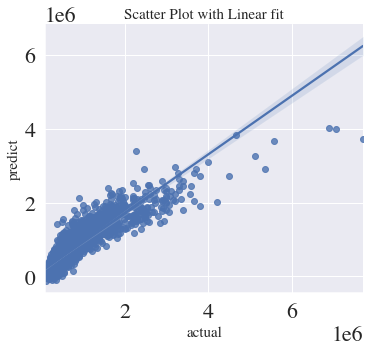

In [396]:
# Plotting the error terms with predicted and actual values.

sns.lmplot(x='actual', y='predict', data=resid)
plt.title("Scatter Plot with Linear fit");

#### The assumptions validated since the graph shows similar variances for actual and predicted. They follow a linear direction.


#### Plotting a histogram of the residuals. Ensuring that the residuals are distributed normally. 

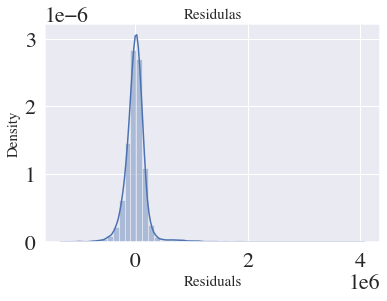

In [397]:
sns.distplot(residuals)
plt.title('Residulas' )
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

#### For the most part the the residuals do follow normal distribution.  

### Conclusions:

I have determined that the most valuable assets of a house in King County are zip code, view, grade and condition, square footage, and seasonality. Below are investment recommendations for Edegon and Company:

**LOCATION:** Invest in the zip codes where the value of the house is higher than average in order to increase the chances of maintaining the house value. Consider investing in zip codes 98118, 98116, 98109, 98122, whose market value is currently mid-range but also include some of the most profitable housing features.  

**VIEW:** Prioritize a house with a great view, particularly if it has a waterfront.

**SEASONALITY:**  Sell during the spring season when prices are at their peak. On average, During the months of March and April, the average price of a house increases by 34,000- 38,000 dollars.

**GRADE** Very important, more than house age. Keeping high end finishes and choosing high quality materials will lead to a profitable outcome. 

**SIZE:** Look for large living area rather than a lot size! Houses ranging from 2,500 sqft to 5,000 sqft have a high correlation to house prices. 
